
## Lecture 1
## Function 1: Beergarden capacity
Write a function
`beer_garden_capacity(guests, tables)`that calculates whether there are enough seats in a beer garden. Each table has 8 seats.The function should return:
- `“There are enough tables!”` → if there is enough space.
- `“Not enough tables, findanother beer
garden!”` → if there are more guests than seats.

In [1]:
def beer_garden_capacity(guests, tables):
    total_seats = tables * 8
    if total_seats >= guests:
        return "There are enough tables!"
    else:
        return "Not enough tables, find another beer garden!"

In [2]:
print(beer_garden_capacity(40, 6))  # "There are enough tables!"
print(beer_garden_capacity(50, 5))  # "Not enough tables, find another beer garden!"

There are enough tables!
Not enough tables, find another beer garden!


## Function 2: Isar swimming warning
Write a function `isar_swimming_warning(temp, flow_rate)`that outputs a warning whether the Isar is too dangerous for swimmers.
- If the water temperature is below 15°C, the function should return `“Warning: The Isar is too cold! ❄️”` should be returned.
- If the flow velocity is above 300 m³/ s, the function `“Warning: The current is too strong! 🌊”` should be returned.
- If both apply, the function
`“Danger! The Isar is too cold and too strong! ⚠️”`.
- If everything is fine, it returns`“Safe to swim! Enjoy the Isar! 🏊‍♂️”`.

In [3]:
def isar_swimming_warning(temp, flow_rate):
    if temp < 15 and flow_rate > 300:
        return "Danger! The Isar is too cold and too strong! ⚠️"
    elif temp < 15:
        return "Warning: The Isar is too cold! ❄️"
    elif flow_rate > 300:
        return "Warning: The current is too strong! 🌊"
    else:
        return "Safe to swim! Enjoy the Isar! 🏊‍♂️"

In [ ]:
print(isar_swimming_warning(14, 250))  # "Warning: The Isar is too cold! ❄️"
print(isar_swimming_warning(16, 320))  # "Warning: The current is too strong! 🌊"
print(isar_swimming_warning(12, 350))  # "Danger! The Isar is too cold and too strong! ⚠️"
print(isar_swimming_warning(18, 280))  # "Safe to swim! Enjoy the Isar! 🏊‍♂️"

### Function 3: Flu cases
Write a function `flu_cases(city_population, infection_rate, days)` that calculates the number of infected people in in several cities in Bavaria over a certain number of days using a simple exponential formula:

$$
{Infected} = {City population}*( 1 - e^-{Infection rate}*{Days}
$$

- The cities and their populations are stored in two lists:
- city_names: Contains the city name (Munich, Nuremberg, Augsburg).
- populations: Contains the respective population figures (1480000, 530000, 300000).
- The infection rate indicates how quickly the disease is spreading (e.g. `0.1` for slow spread, `0.3` for fast spread).
- The function should round up the calculated number and output it in a formatted string.

Note: `math.exp(-rate * days)` calculates the exponential term.

In [7]:
import math
def flu_cases(city_names, city_population, infection_rate, days):
    results = []
    for i in range(len(city_names)):
        infected = city_population[i]*(1-math.exp(-infection_rate*days))
        results.append(f"{city_names[i]}: {round(infected):,}")
    return results

city_names = ["Munich", "Nuremberg", "Ausburg"]
city_population = [1480000, 530000, 300000]

In [8]:
print(flu_cases(city_names, city_population, 0.1, 7))
print(flu_cases(city_names, city_population, 0.3, 7))

['Munich: 745,054', 'Nuremberg: 266,810', 'Ausburg: 151,024']
['Munich: 1,298,764', 'Nuremberg: 465,098', 'Ausburg: 263,263']


### Lecture 2



## Exercise: Pandas & NumPy with Spotify Dataset
Use pandas and NumPy to analyze, filter, manipulate, and visualize data from the Spotify 2023 dataset.

### Task 1: Data exploration and cleaning
1. Load the dataset in pandas.
2. Check for missing values and handle them:
    - Replace missing values in the "key" column with "Unknown".
    - Fill missing values in "in_shazam_charts" with 0.
3. Filter the dataset:
    - Extract all tracks from 2023 that have been in Spotify Charts at least 50 times.
    - Save this subset as "popular_tracks_2023.csv".

In [10]:
import pandas as pd

spotify_df = pd.read_csv("spotify-2023.csv", encoding_errors="ignore")

In [11]:
missing_values = spotify_df.isnull().sum()
print(missing_values)

track_name               2
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [12]:
total_missing = spotify_df.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")


Total missing values in dataset: 147


In [13]:
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [15]:
# Replace missing values in the "key" column with "Unknown"
spotify_df["key"].fillna("Unknown", inplace=True)

# Verify changes
print(spotify_df["key"].isnull().sum())  # Should print 0 if all missing values are replaced


0


In [17]:
 # Fill missing values in "in_shazam_charts" with 0.
spotify_df["in_shazam_charts"].fillna("0", inplace=True)
print(spotify_df["in_shazam_charts"].isnull().sum())

0


In [18]:
# Filter tracks that have been in Spotify Charts at least 50 times
tracks_50 = spotify_df[spotify_df["in_spotify_charts"] >= 50]
tracks_50.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24


In [19]:
#Save this subset as "popular_tracks_2023.csv".
tracks_50.to_csv("popular_tracks.csv", index=False)

  ### Task 2: Statistical analysis and aggregation
1. Calculate basic statistics:
    - Find the average BPM (tempo) by key.
    - Find the average energy level for songs with more than 100 million streams.
2. Sort the dataset:
    - Find the top 10 most streamed songs.
    - Find the 5 least danceable songs.
3. Group the dataset:
    - Count how many tracks belong to each mode (Major/Minor).

In [22]:
#Average BPM by key
# Group by 'key' and calculate the average BPM
average_bpm_by_key = spotify_df.groupby("key")["bpm"].mean().round(2).reset_index()

# Rename columns for clarity
average_bpm_by_key.columns = ["Key", "Average BPM"]

# Display the table
average_bpm_by_key.head()

,Key,Average BPM
0,A,127.84
1,A#,119.72
2,B,121.54
3,C#,122.34
4,D,123.80


In [23]:
# Find the average energy level for songs with more than 100 million streams.
#Convert column "streams" to numeric
spotify_df["streams"] = pd.to_numeric(spotify_df["streams"], errors="coerce")
tracks_100_million_streams = spotify_df[spotify_df["streams"] > 100000000]
average_energy = tracks_100_million_streams["energy_%"].mean()
print(average_energy)


64.1125


In [24]:
# Sort the dataset:
#Find the top 10 most streamed songs.
top_10_streamed = spotify_df.sort_values(by="streams", ascending=False).head(10)

# Display the top 10 most streamed songs
top_10_song_names = top_10_streamed["track_name"].tolist()
print("\n".join(top_10_song_names))

Blinding Lights
Shape of You
Someone You Loved
Dance Monkey
Sunflower - Spider-Man: Into the Spider-Verse
One Dance
STAY (with Justin Bieber)
Believer
Closer
Starboy


In [25]:
#Find the 5 least danceable songs.
top_5_less_danceable = spotify_df.sort_values(by="danceability_%", ascending=True).head(5)
top_5_less_danceable_names = top_5_less_danceable["track_name"].tolist()
print("\n".join(top_5_less_danceable_names))


White Christmas
It's the Most Wonderful Time of the Year
Lift Me Up - From Black Panther: Wakanda Forever - Music From and Inspired By
Dawn FM
Starry Eyes


### Task 3: Feature engineering
1. Create a new variable "track_popularity" using the following logic:
    - "Super Hit" if streams > 500M.
    - "Hit" if streams between 100M and 500M.
    - "Moderate" if streams between 50M and 100M.
    - "Less Popular" otherwise.
2. Save the modified dataset with the new column as "track_popularity_data.csv".

In [27]:
def classify_popularity(streams):
    if streams > 500000000:
        return "Super Hit"
    elif 100000000 <= streams <= 500000000:
        return "Hit"
    elif 50000000 <= streams < 100000000:
        return "Moderate"
    else:
        return "Less Popular"

# Apply the function to create a new column 'track_popularity'
spotify_df["track_popularity"] = spotify_df["streams"].apply(classify_popularity)

# Display the first few rows to check the results
print(spotify_df[["track_name", "streams", "track_popularity"]].head())

                            track_name      streams track_popularity
0  Seven (feat. Latto) (Explicit Ver.)  141381703.0              Hit
1                                 LALA  133716286.0              Hit
2                              vampire  140003974.0              Hit
3                         Cruel Summer  800840817.0        Super Hit
4                       WHERE SHE GOES  303236322.0              Hit


In [28]:
  # Save the modified dataset with the new column
spotify_df.to_csv("track_popularity_data.csv", index=False)
print("Modified dataset saved as 'track_popularity_data.csv'")

Modified dataset saved as 'track_popularity_data.csv'


### Task 4: Unique Task
Each student must create their own unique variable in the dataset. Choose one approach:
1. Assign a playlist ranking (playlist_rank):
    - Generate a random rank between 1 and 100 for each track using np.random.randint().
2. Create an emotional category (mood_category):
    - Categorize songs based on valence (happiness) and energy.
      - "Energetic & Happy" if valence > 60 and energy > 70.
      - "Calm & Happy" if valence > 60 and energy <= 70.
      - "Sad" if valence < 40.
      - "Neutral" otherwise.
3. Define a personal popularity score (custom_popularity_score):
    - Use a custom formula (e.g., (streams / bpm) * danceability_%).

In [30]:
spotify_df["valence_%"] = pd.to_numeric(spotify_df["valence_%"], errors="coerce")
spotify_df["energy_%"] = pd.to_numeric(spotify_df["energy_%"], errors="coerce")

In [31]:
# Define function for classifying emotional state
def emotional_state_emily(row):
    if row["valence_%"] > 60 and row["energy_%"] > 70:
        return "Energetic & Happy"
    elif row["valence_%"] > 60 and row["energy_%"] <= 70:
        return "Calm & Happy"
    elif row["valence_%"] < 40:
        return "Sad"
    else:
        return "Neutral"

In [32]:
# Apply function row-wise and create new column 'emotional_state'
spotify_df["emotional_state"] = spotify_df.apply(emotional_state_emily, axis=1)

# Create a new dataset with the added emotional_state column
emotional_state_database = spotify_df.copy()

# Display a preview of the new dataset
print(emotional_state_database[["track_name", "valence_%", "energy_%", "emotional_state"]].head())

#Save the correct dataset
emotional_state_database.to_csv("emotional_state_database.csv", index=False)

print("New dataset saved as 'emotional_state_database.csv'")


                            track_name  valence_%  energy_%    emotional_state
0  Seven (feat. Latto) (Explicit Ver.)         89        83  Energetic & Happy
1                                 LALA         61        74  Energetic & Happy
2                              vampire         32        53                Sad
3                         Cruel Summer         58        72            Neutral
4                       WHERE SHE GOES         23        80                Sad
New dataset saved as 'emotional_state_database.csv'


In [33]:
emotional_state_database.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_popularity,emotional_state
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,Major,80,89,83,31,0,8,4,Hit,Energetic & Happy
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,Major,71,61,74,7,0,10,4,Hit,Energetic & Happy
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,Major,51,32,53,17,0,31,6,Hit,Sad
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,Major,55,58,72,11,0,11,15,Super Hit,Neutral
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,Minor,65,23,80,14,63,11,6,Hit,Sad


## Lecture 3
## Exercise: Pandas & NumPy with Student Performance Dataset

You are provided with three separate datasets, all originally derived from a single dataset. However, these datasets have undergone slight modifications through different processes. Your task is to analyze the datasets, identify the differences, and correctly merge them back together.

**Important Notes**:
- Some column names have been changed and need to be translated back.
- Certain categorical variables have altered values (e.g., some categories have been renamed).
- Check the distribution of numerical variables, as there may be discrepancies.
- Missing values are present in multiple columns and need to be imputed appropriately. Justify your choice of imputation method.
- Some columns have been stored in different data types (e.g., numbers as strings). Ensure that data types are correct before merging the datasets.

Your Task:
1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.
3. Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.
4. Save the final dataset as Merged_StudentData.csv.
5. Perform hypothesis tests to analyze relationships between the following variables: `Sleep_Hours`, `Exam_Score`, `Internet_Access`, `Hours_Studied`, and `Tutoring_Sessions`.
    #%% md
### Hypotheses testing

Hypothesis 1: There is a positive correlation between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.
    #%% md
Hypothesis 2: Students with Internet access (Internet_Access) spend more time studying (Hours_Studied) than students without Internet access.
- Create a boxplot for visualization and check for outliers.
- Remove extreme values according to boxplot definition.

In [35]:
#1. Load all three datasets into Python.

import numpy as np
df1 = pd.read_csv("Student Data Part 1 mv.csv")
df2 = pd.read_csv("Student Data Part 2 mv.csv")
df3 = pd.read_csv("Student Data Part 3 mv.csv")
# Get column names for each dataset
cols1 = set(df1.columns)
cols2 = set(df2.columns)
cols3 = set(df3.columns)

In [36]:
# Find differences in column names
print("Columns in df1 but not in df2:", cols1 - cols2)
print("Columns in df2 but not in df1:", cols2 - cols1)
print("Columns in df1 but not in df3:", cols1 - cols3)
print("Columns in df3 but not in df1:", cols3 - cols1)
print("Columns in df2 but not in df3:", cols2 - cols3)
print("Columns in df3 but not in df2:", cols3 - cols2)

Columns in df1 but not in df2: {'Attendance', 'Rest_Hours', 'Study_Hours', 'Parental_Involvement', 'Access_to_Resources'}
Columns in df2 but not in df1: {'Tutoring_Sessions', 'Family_Income', 'School_Type', 'Internet_Access', 'Unnamed: 0', 'Teacher_Quality'}
Columns in df1 but not in df3: {'Attendance', 'Rest_Hours', 'Study_Hours', 'Parental_Involvement', 'Access_to_Resources'}
Columns in df3 but not in df1: {'Parental_Education_Level', 'Distance_from_Home', 'Final_Score', 'Gender'}
Columns in df2 but not in df3: {'Tutoring_Sessions', 'Family_Income', 'School_Type', 'Internet_Access', 'Unnamed: 0', 'Teacher_Quality'}
Columns in df3 but not in df2: {'Parental_Education_Level', 'Distance_from_Home', 'Final_Score', 'Gender'}


In [37]:
# Print column names with their data types
print(df1.dtypes)

Student_ID                int64
Study_Hours               int64
Attendance                int64
Rest_Hours              float64
Parental_Involvement     object
Access_to_Resources      object
dtype: object


In [38]:
print(df2.dtypes)

Unnamed: 0             int64
Student_ID             int64
Internet_Access       object
Tutoring_Sessions    float64
Family_Income         object
Teacher_Quality       object
School_Type           object
dtype: object


In [39]:
print(df3.dtypes)

Student_ID                    int64
Final_Score                 float64
Parental_Education_Level     object
Distance_from_Home           object
Gender                       object
dtype: object


In [48]:
# Selecting only required columns + 'Student_ID' for merging
df2_selected = df2[['Student_ID', 'School_Type', 'Tutoring_Sessions', 'Internet_Access',
                    'Teacher_Quality', 'Family_Income', 'Unnamed: 0']]

df3_selected = df3[['Student_ID', 'Distance_from_Home', 'Final_Score',
                    'Parental_Education_Level', 'Gender']]

# Merge df1 with df2 and df3 based on 'Student_ID'
df1_merged = df1.merge(df2_selected, on='Student_ID', how='left')  # Left join to keep all df1 rows
df1_merged = df1_merged.merge(df3_selected, on='Student_ID', how='left')

In [42]:
print(df1_merged.dtypes)

Student_ID                    int64
Study_Hours                   int64
Attendance                    int64
Rest_Hours                  float64
Parental_Involvement         object
Access_to_Resources          object
School_Type                  object
Tutoring_Sessions           float64
Internet_Access              object
Teacher_Quality              object
Family_Income                object
Unnamed: 0                  float64
Distance_from_Home           object
Final_Score                 float64
Parental_Education_Level     object
Gender                       object
dtype: object


In [43]:
# Find differences in column names
print("Columns in df2 but not in df1_merged:", cols2 - cols1)
print("Columns in df3 but not in df1_merged:", cols3 - cols1)

Columns in df2 but not in df1_merged: {'Tutoring_Sessions', 'Family_Income', 'School_Type', 'Internet_Access', 'Unnamed: 0', 'Teacher_Quality'}
Columns in df3 but not in df1_merged: {'Parental_Education_Level', 'Distance_from_Home', 'Final_Score', 'Gender'}


In [44]:
df1_merged.head()

,Student_ID,Study_Hours,Attendance,Rest_Hours,Parental_Involvement,Access_to_Resources,School_Type,Tutoring_Sessions,Internet_Access,Teacher_Quality,Family_Income,Unnamed: 0,Distance_from_Home,Final_Score,Parental_Education_Level,Gender
0,1,23,84,8.0,Low,High,Public,0.0,Available,Medium,Low,0.0,Close,65.0,High School,Male
1,2,19,64,9.0,Low,Medium,Public,2.0,Available,Medium,Medium,1.0,Medium,59.0,College,Female
2,3,24,98,8.0,Medium,Medium,Public,2.0,Available,Medium,Medium,2.0,Close,72.0,Postgraduate,Male
3,4,29,89,9.0,Low,Medium,Public,1.0,Available,Medium,Medium,3.0,Medium,69.0,High School,Male
4,5,19,92,7.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN,NaN,Close,68.0,College,Female


In [45]:
print(df1_merged.dtypes)

Student_ID                    int64
Study_Hours                   int64
Attendance                    int64
Rest_Hours                  float64
Parental_Involvement         object
Access_to_Resources          object
School_Type                  object
Tutoring_Sessions           float64
Internet_Access              object
Teacher_Quality              object
Family_Income                object
Unnamed: 0                  float64
Distance_from_Home           object
Final_Score                 float64
Parental_Education_Level     object
Gender                       object
dtype: object


In [46]:
# Count missing values in each column
missing_values = df1_merged.isnull().sum()
print(missing_values[missing_values > 0])

Rest_Hours                   330
School_Type                  991
Tutoring_Sessions           1272
Internet_Access             1272
Teacher_Quality             1057
Family_Income                991
Unnamed: 0                   991
Distance_from_Home            67
Final_Score                  330
Parental_Education_Level      90
dtype: int64


In [53]:
#Check the Distribution of all the variables
!pip install matplotlib
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [66]:
df1_merged.drop(columns=['Unnamed: 0'], inplace=True)


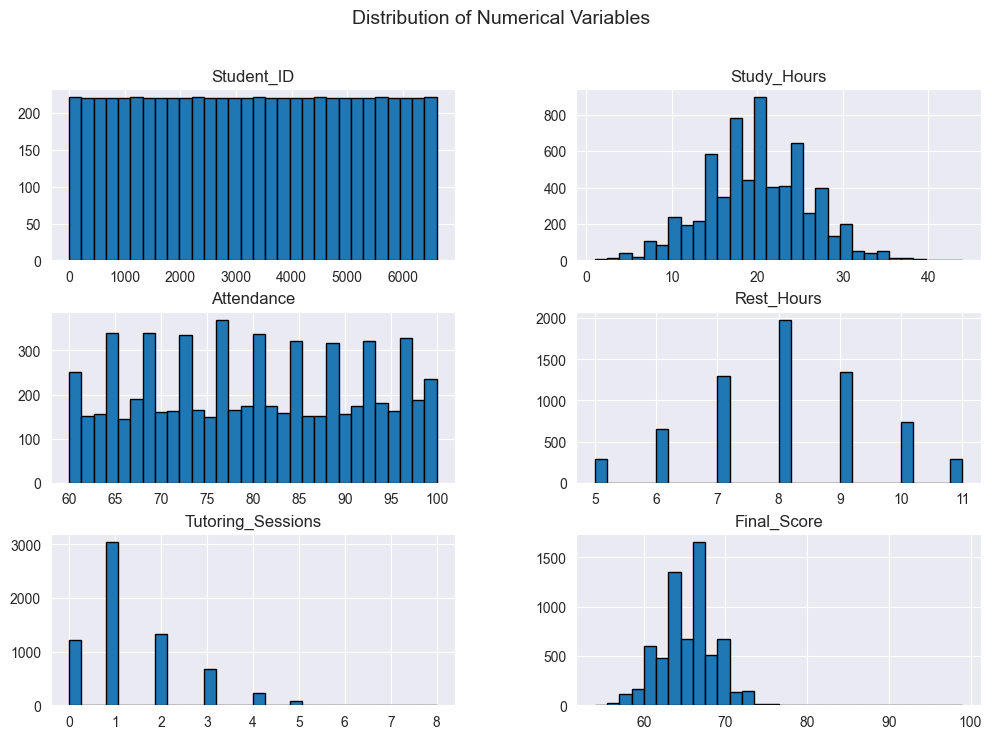

        Student_ID  Study_Hours   Attendance   Rest_Hours  Tutoring_Sessions  \
count  6607.000000  6607.000000  6607.000000  6607.000000        6607.000000   
mean   3304.000000    19.975329    79.977448     8.033298           1.394582   
std    1907.420946     5.990594    11.547475     1.429474           1.118902   
min       1.000000     1.000000    60.000000     5.000000           0.000000   
25%    1652.500000    16.000000    70.000000     7.000000           1.000000   
50%    3304.000000    20.000000    80.000000     8.000000           1.000000   
75%    4955.500000    24.000000    90.000000     9.000000           2.000000   
max    6607.000000    44.000000   100.000000    11.000000           8.000000   

       Final_Score  
count  6607.000000  
mean     65.277282  
std       3.806117  
min      54.000000  
25%      63.000000  
50%      65.000000  
75%      67.000000  
max      99.000000  


In [67]:
# Select only numerical columns
numerical_cols = df1_merged.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical variables
df1_merged[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.show()

# Print summary statistics for numerical variables
print(df1_merged[numerical_cols].describe())

In [68]:
# Imputation of numeric variables

# Study_Hours -> Imputation method: Mean (Mean preserves normal distribution)
df1_merged['Study_Hours'] = df1_merged['Study_Hours'].fillna(df1_merged['Study_Hours'].mean())

# Rest_Hours -> Imputation method: Median (Median is more robust for skewed data)
df1_merged['Rest_Hours'] = df1_merged['Rest_Hours'].fillna(df1_merged['Rest_Hours'].median())

# Final_Score -> Imputation method: Mode (Scores are categorical-like)
mode_final_score = df1_merged['Final_Score'].mode()
if not mode_final_score.empty:
    df1_merged['Final_Score'] = df1_merged['Final_Score'].fillna(mode_final_score[0])

# Attendance -> Imputation method: Mean (Mean preserves normal distribution)
df1_merged['Attendance'] = df1_merged['Attendance'].fillna(df1_merged['Attendance'].mean())

# Tutoring_Sessions -> Imputation method: Mode (Since most students have 0 or 1 sessions, it preserves the original distribution)
mode_sessions = df1_merged['Tutoring_Sessions'].mode()
if not mode_sessions.empty:
    df1_merged['Tutoring_Sessions'] = df1_merged['Tutoring_Sessions'].fillna(mode_sessions[0])


In [69]:
print(df1_merged.isnull().sum())  # Should return 0 for these variables

Student_ID                  0
Study_Hours                 0
Attendance                  0
Rest_Hours                  0
Parental_Involvement        0
Access_to_Resources         0
School_Type                 0
Tutoring_Sessions           0
Internet_Access             0
Teacher_Quality             0
Family_Income               0
Distance_from_Home          0
Final_Score                 0
Parental_Education_Level    0
Gender                      0
dtype: int64


In [70]:
# Missing values for categorical variables: We use the mode

# School_Type
mode_school_type = df1_merged['School_Type'].mode()
if not mode_school_type.empty:
    df1_merged['School_Type'] = df1_merged['School_Type'].fillna(mode_school_type[0])

# Internet_Access
mode_internet_access = df1_merged['Internet_Access'].mode()
if not mode_internet_access.empty:
    df1_merged['Internet_Access'] = df1_merged['Internet_Access'].fillna(mode_internet_access[0])

# Teacher_Quality
mode_teacher_quality = df1_merged['Teacher_Quality'].mode()
if not mode_teacher_quality.empty:
    df1_merged['Teacher_Quality'] = df1_merged['Teacher_Quality'].fillna(mode_teacher_quality[0])

# Family_Income
mode_family_income = df1_merged['Family_Income'].mode()
if not mode_family_income.empty:
    df1_merged['Family_Income'] = df1_merged['Family_Income'].fillna(mode_family_income[0])

# Distance_from_Home
mode_distance_home = df1_merged['Distance_from_Home'].mode()
if not mode_distance_home.empty:
    df1_merged['Distance_from_Home'] = df1_merged['Distance_from_Home'].fillna(mode_distance_home[0])

# Parental_Education_Level
mode_parent_edu = df1_merged['Parental_Education_Level'].mode()
if not mode_parent_edu.empty:
    df1_merged['Parental_Education_Level'] = df1_merged['Parental_Education_Level'].fillna(mode_parent_edu[0])


In [71]:
print(df1_merged.dtypes)

Student_ID                    int64
Study_Hours                   int64
Attendance                    int64
Rest_Hours                  float64
Parental_Involvement         object
Access_to_Resources          object
School_Type                  object
Tutoring_Sessions           float64
Internet_Access              object
Teacher_Quality              object
Family_Income                object
Distance_from_Home           object
Final_Score                 float64
Parental_Education_Level     object
Gender                       object
dtype: object


In [72]:
#Convert variable types
# Convert 'Final_Score' and 'Tutoring_Sessions' into categorical
df1_merged['Final_Score'] = df1_merged['Final_Score'].astype('category')
df1_merged['Tutoring_Sessions'] = df1_merged['Tutoring_Sessions'].astype('category')

# Verify the changes
print(df1_merged.dtypes)  # Check if they are now categorical


Student_ID                     int64
Study_Hours                    int64
Attendance                     int64
Rest_Hours                   float64
Parental_Involvement          object
Access_to_Resources           object
School_Type                   object
Tutoring_Sessions           category
Internet_Access               object
Teacher_Quality               object
Family_Income                 object
Distance_from_Home            object
Final_Score                 category
Parental_Education_Level      object
Gender                        object
dtype: object


In [73]:
#Save Dataset
df1_merged.to_csv('Merged_StudentData.csv', index=False)
print("Dataset saved as 'Merged_StudentData.csv'")


Dataset saved as 'Merged_StudentData.csv'


### Hypotheses testing
Hypothesis 1: There is a positive correlation between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.


In [74]:
!pip install scipy
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [75]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [80]:
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [76]:
# Hypothesis tests

# i. Correlation test between numerical variables
# Checking correlation between 'Rest_Hours', 'Final_Score', 'Study_Hours', and 'Tutoring_Sessions'

numerical_columns = ['Rest_Hours', 'Final_Score', 'Study_Hours', 'Tutoring_Sessions']

# Pearson correlation
correlation_matrix = merged_df[numerical_columns].corr(method='pearson')

# Display the correlation matrix
print("\nPearson Correlation Matrix:")
print(correlation_matrix)


Pearson Correlation Matrix:
                   Rest_Hours  Final_Score  Study_Hours  Tutoring_Sessions
Rest_Hours           1.000000    -0.013534     0.018445          -0.010203
Final_Score         -0.013534     1.000000     0.429413           0.128371
Study_Hours          0.018445     0.429413     1.000000          -0.015124
Tutoring_Sessions   -0.010203     0.128371    -0.015124           1.000000


In [81]:
# Compute Pearson and Spearman Correlation
pearson_corr, pearson_p = stats.pearsonr(df1_merged['Final_Score'], df1_merged['Rest_Hours'])
spearman_corr, spearman_p = stats.spearmanr(df1_merged['Final_Score'], df1_merged['Rest_Hours'])

# Print Correlation Results
print(f"Pearson Correlation: {pearson_corr:.3f} (p-value: {pearson_p:.5f})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p-value: {spearman_p:.5f})")

Pearson Correlation: -0.014 (p-value: 0.26108)
Spearman Correlation: -0.003 (p-value: 0.79867)


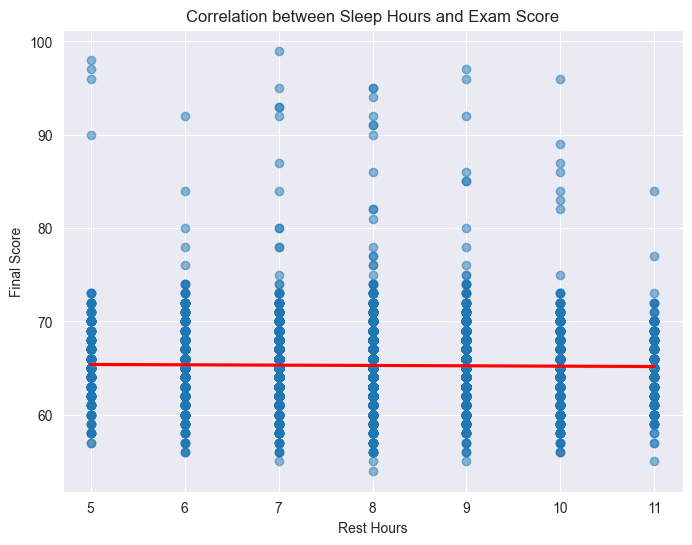

In [82]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df1_merged['Rest_Hours'], y=df1_merged['Final_Score'], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Correlation between Sleep Hours and Exam Score")
plt.xlabel("Rest Hours")
plt.ylabel("Final Score")
plt.show()

In [83]:
# ii. Chi-Square test for categorical variables
# between 'Internet_Access' and 'Family_Income' 
# contingency table 

contingency_table = pd.crosstab(merged_df['Internet_Access'], merged_df['Family_Income'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results of the Chi-Square test
print("\nChi-Square Test between 'Internet_Access' and 'Family_Income':")
print(f"Chi2 Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")

# Interpretation of the p-value for Chi-Square Test
if p < 0.05:
    print("There is a significant relationship between 'Internet_Access' and 'Family_Income'.")
else:
    print("There is no significant relationship between 'Internet_Access' and 'Family_Income'.")


Chi-Square Test between 'Internet_Access' and 'Family_Income':
Chi2 Statistic: 28.977005195001063
Degrees of Freedom: 2
P-Value: 5.101798136925641e-07
There is a significant relationship between 'Internet_Access' and 'Family_Income'.


In [84]:
# Define the 3% cut-off for outliers
lower_bound = np.percentile(df1_merged['Rest_Hours'], 3)  # Bottom 3%
upper_bound = np.percentile(df1_merged['Rest_Hours'], 97)  # Top 3%

# Filter dataset to remove outliers
df1_filtered = df1_merged[(df1_merged['Rest_Hours'] >= lower_bound) & (df1_merged['Rest_Hours'] <= upper_bound)]

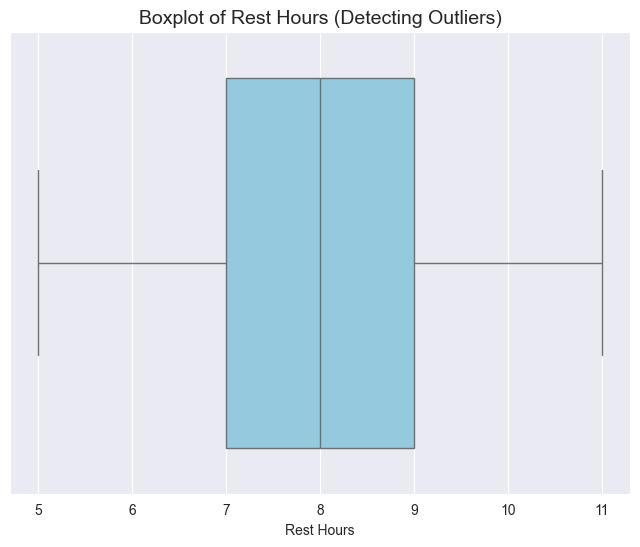

In [85]:
# Boxplot to visualize outliers in Sleep_Hours
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1_filtered['Rest_Hours'], color='skyblue')

# Add title and labels
plt.title("Boxplot of Rest Hours (Detecting Outliers)", fontsize=14)
plt.xlabel("Rest Hours")

# Show plot
plt.show()

In [86]:
# Compute Pearson and Spearman Correlation
pearson_corr, pearson_p = stats.pearsonr(df1_filtered['Final_Score'], df1_filtered['Rest_Hours'])
spearman_corr, spearman_p = stats.spearmanr(df1_filtered['Final_Score'], df1_filtered['Rest_Hours'])

# Print Correlation Results
print(f"Pearson Correlation: {pearson_corr:.3f} (p-value: {pearson_p:.5f})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p-value: {spearman_p:.5f})")

Pearson Correlation: -0.014 (p-value: 0.26108)
Spearman Correlation: -0.003 (p-value: 0.79867)


/var/folders/lm/tgd9q6xn3vv6z1_vz6ncjpk80000gn/T/ipykernel_95277/743517109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1_merged['Internet_Access'], y=df1_merged['Study_Hours'], palette="coolwarm")


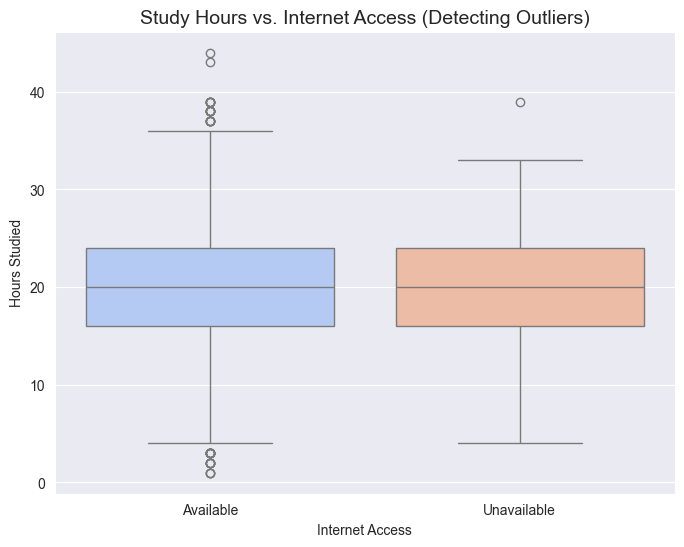

In [88]:
# Create a boxplot to visualize study hours for students with/without internet access
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1_merged['Internet_Access'], y=df1_merged['Study_Hours'], palette="coolwarm")

# Add title and labels
plt.title("Study Hours vs. Internet Access (Detecting Outliers)", fontsize=14)
plt.xlabel("Internet Access")
plt.ylabel("Hours Studied")

# Show plot
plt.show()

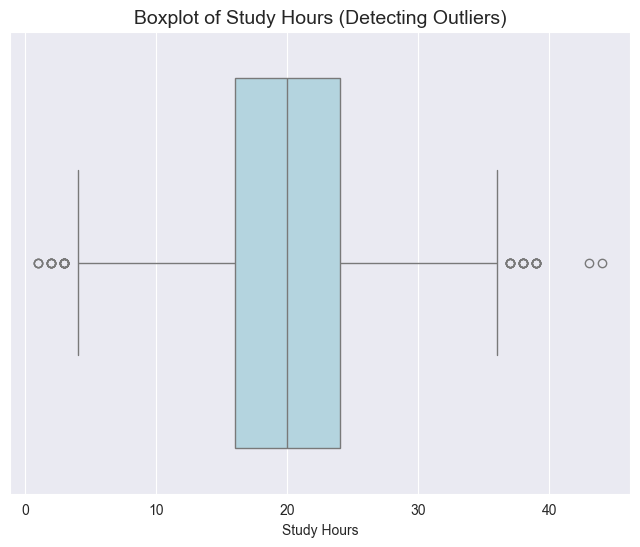

In [89]:
# Create a boxplot for Study_Hours to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1_merged['Study_Hours'], color='lightblue')

# Add title and labels
plt.title("Boxplot of Study Hours (Detecting Outliers)", fontsize=14)
plt.xlabel("Study Hours")

# Show plot
plt.show()

In [90]:
#Remove outliers
# Compute IQR (Interquartile Range) for Study_Hours
Q1 = df1_merged['Study_Hours'].quantile(0.25)  # 25th percentile
Q3 = df1_merged['Study_Hours'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme values
df1_filtered = df1_merged[(df1_merged['Study_Hours'] >= lower_bound) & (df1_merged['Study_Hours'] <= upper_bound)]

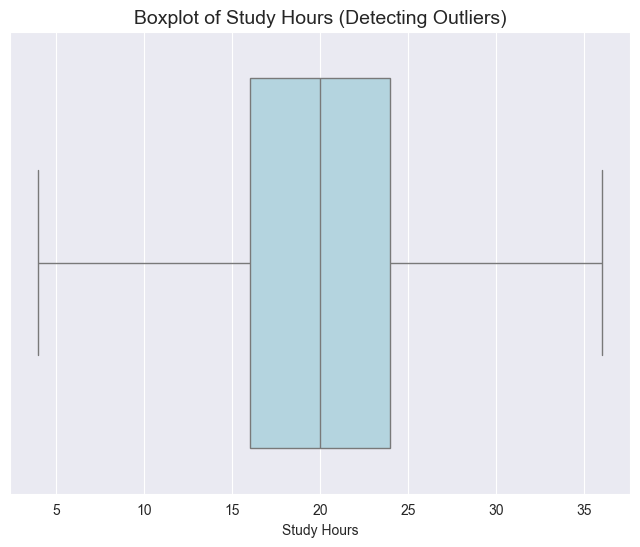

In [91]:
#Check boxplot again
# Create a boxplot for Study_Hours to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1_filtered['Study_Hours'], color='lightblue')

# Add title and labels
plt.title("Boxplot of Study Hours (Detecting Outliers)", fontsize=14)
plt.xlabel("Study Hours")

# Show plot
plt.show()

/var/folders/lm/tgd9q6xn3vv6z1_vz6ncjpk80000gn/T/ipykernel_95277/3162828545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1_filtered['Internet_Access'], y=df1_filtered['Study_Hours'], palette="coolwarm")


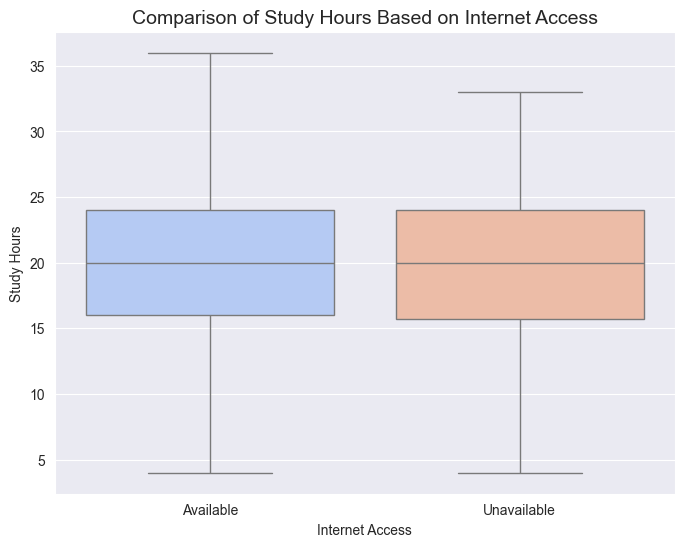

In [92]:
# Create a boxplot to compare Study Hours between students with and without Internet Access
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1_filtered['Internet_Access'], y=df1_filtered['Study_Hours'], palette="coolwarm")

# Add title and labels
plt.title("Comparison of Study Hours Based on Internet Access", fontsize=14)
plt.xlabel("Internet Access")
plt.ylabel("Study Hours")

# Show plot
plt.show()

In [93]:
from scipy.stats import ttest_ind

In [94]:
# Separate groups: students with and without Internet access
group_with_internet = df1_filtered[df1_filtered['Internet_Access'] == 'Available']['Study_Hours']
group_without_internet = df1_filtered[df1_filtered['Internet_Access'] == 'Unavailable']['Study_Hours']

# Perform independent t-test
t_stat, p_value = ttest_ind(group_with_internet, group_without_internet)

# Print the results
print(f"T-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}")

T-test: t-statistic = 0.511, p-value = 0.60958


In [95]:
print(df1_filtered[['Internet_Access', 'Study_Hours']].isnull().sum())

Internet_Access    0
Study_Hours        0
dtype: int64


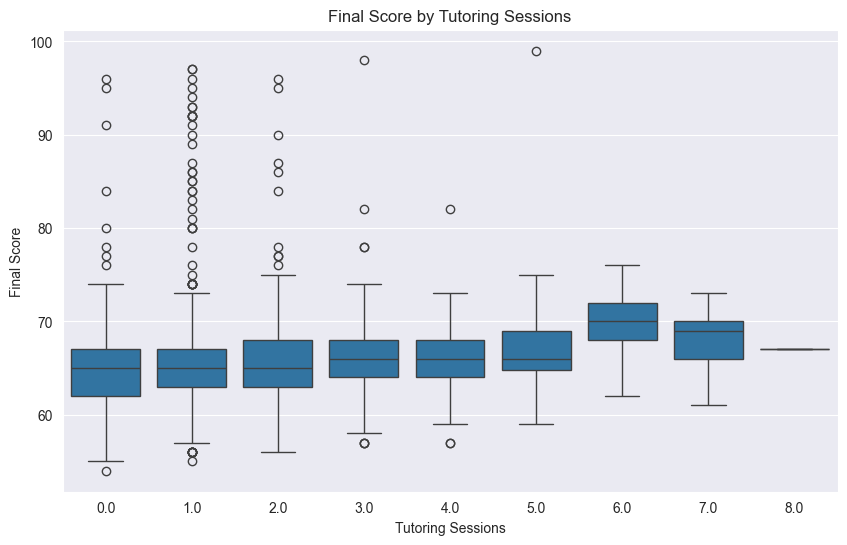

In [96]:
###Hypothesis 3: Students who receive tutoring (Tutoring_Sessions) have higher exam grades than students without tutoring.

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare Final_Score by Tutoring_Sessions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tutoring_Sessions', y='Final_Score', data=merged_df)
plt.title('Final Score by Tutoring Sessions')
plt.xlabel('Tutoring Sessions')
plt.ylabel('Final Score')
plt.show()


In [97]:
# Calculate the IQR for Final_Score
Q1 = merged_df['Final_Score'].quantile(0.25)
Q3 = merged_df['Final_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in Final_Score for both 'Tutoring_Sessions' categories
filtered_df = merged_df[(merged_df['Final_Score'] >= lower_bound) & 
                        (merged_df['Final_Score'] <= upper_bound)]

# Display the filtered dataset
print(filtered_df.head())


   Student_ID  Study_Hours  Attendance  Rest_Hours Parental_Involvement  \
0           1           23          84         8.0                  Low   
1           2           19          64         9.0                  Low   
2           3           24          98         8.0               Medium   
3           4           29          89         9.0                  Low   
4           5           19          92         7.0               Medium   

  Access_to_Resources Internet_Access  Tutoring_Sessions Family_Income  \
0                High       Available                0.0           Low   
1              Medium       Available                2.0        Medium   
2              Medium       Available                2.0        Medium   
3              Medium       Available                1.0        Medium   
4              Medium       Available                1.0        Medium   

  Teacher_Quality School_Type  Final_Score Parental_Education_Level  \
0          Medium      Public    

In [99]:
###from scipy import stats

# Create two groups: students with tutoring and students without tutoring
group_with_tutoring = filtered_df[filtered_df['Tutoring_Sessions'] > 0]['Final_Score']
group_without_tutoring = filtered_df[filtered_df['Tutoring_Sessions'] == 0]['Final_Score']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_with_tutoring, group_without_tutoring)

# Display the results
print("t-statistic:", t_stat)
print("p-value:", p_value)


### Hypothesis 3 Result: There is a statistically significant difference in the exam scores (Final_Score) between students who received tutoring and those who did not
#t-statistic: 6.741701645283291
#p-value: 1.700020554922016e-11

t-statistic: 6.741701645283291
p-value: 1.700020554922016e-11


In [ ]:
## Lecture 4
## Exercise
Every year, the city of Munich updates a data set that shows visitor numbers, drinking mood and Hendl consumption.

https://opendata.muenchen.de/en/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2

In [100]:
df = pd.read_csv("Oktoberfest.csv")


      ### Task 1
Create **two different visualizations** and display them **side by side** using subplots. The goal is to analyze historical Oktoberfest data and explore possible relationships between key variables.

**Beer Price Development**
- Create a **line plot** that shows how **beer prices** have changed over the years.
- Make sure to label the axes and add a **title** to the plot.

**Relationship Between Beer and Roasted Chicken Consumption**
- Create a **scatter plot** that examines the relationship between **beer consumption and roasted chicken consumption**.
- Add a **regression line** to highlight possible trends.
- Ensure the axes are properly labeled and add a **title** to the plot.

**Subplots**
- Display both visualizations **side by side** using **subplots**.
- Adjust the layout so that the figures are **well-proportioned and easy to read**.


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from scipy.ndimage import gaussian_filter1d

In [102]:
# Display column names (variables)
print("Variables in the dataset:")
print(df.columns.tolist())

Variables in the dataset:
['jahr', 'dauer', 'besucher_gesamt', 'besucher_tag', 'bier_preis', 'bier_konsum', 'hendl_preis', 'hendl_konsum']


In [103]:
df.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


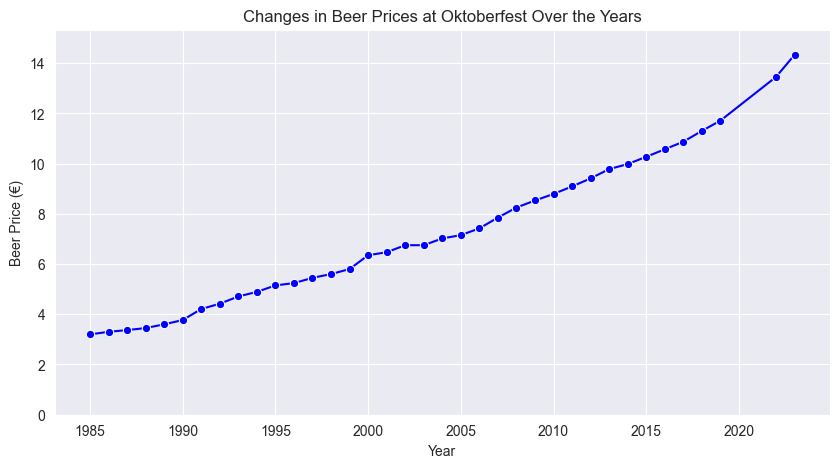

In [104]:
# Plot the beer price changes over the years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="jahr", y="bier_preis", marker="o", color="b")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Beer Price (€)")
plt.title("Changes in Beer Prices at Oktoberfest Over the Years")
plt.ylim(0, df["bier_preis"].max() + 1)
plt.grid(True)

# Show the plot
plt.show()

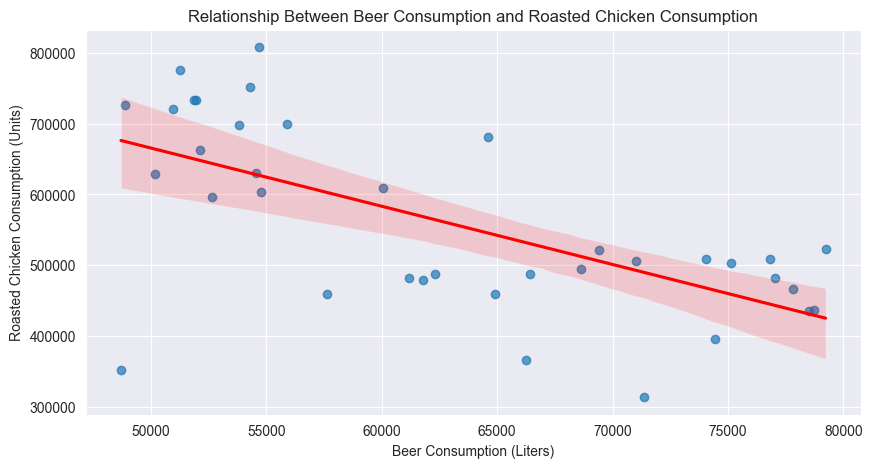

In [105]:
# Create the scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x="bier_konsum", y="hendl_konsum", scatter_kws={'alpha':0.7}, line_kws={"color": "red"})

# Add labels and title
plt.xlabel("Beer Consumption (Liters)")
plt.ylabel("Roasted Chicken Consumption (Units)")
plt.title("Relationship Between Beer Consumption and Roasted Chicken Consumption")
plt.grid(True)

# Show the plot
plt.show()

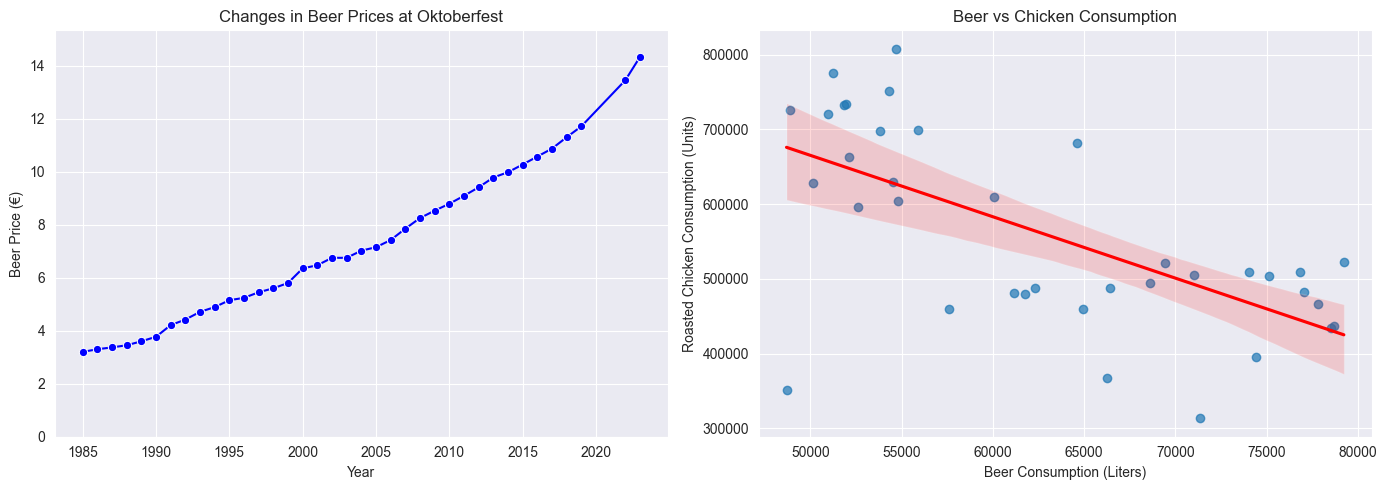

In [106]:
# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Line Plot: Beer Price Over Years ----
sns.lineplot(ax=axes[0], data=df, x="jahr", y="bier_preis", marker="o", color="b")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Beer Price (€)")
axes[0].set_title("Changes in Beer Prices at Oktoberfest")
axes[0].set_ylim(0, df["bier_preis"].max() + 1)  # Start Y-axis at 0
axes[0].grid(True)

# ---- Scatter Plot: Beer vs Chicken Consumption ----
sns.regplot(ax=axes[1], data=df, x="bier_konsum", y="hendl_konsum", scatter_kws={'alpha': 0.7}, line_kws={"color": "red"})
axes[1].set_xlabel("Beer Consumption (Liters)")
axes[1].set_ylabel("Roasted Chicken Consumption (Units)")
axes[1].set_title("Beer vs Chicken Consumption")
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [107]:
from scipy.ndimage import gaussian_filter1d


### Task 2: Analyzing Beer and Roasted Chicken Prices vs. Consumption
Analyze how **beer and roasted chicken prices** have evolved over time and how this relates to **beer consumption** at the Oktoberfest.

**Plot Beer and Roasted Chicken Prices Over Time**
- Create a **line plot** showing the **beer and roasted chicken prices** over the years.
- Use **distinct colors and markers** to differentiate both price trends.
- Label the axes properly and add a **legend** to indicate which line corresponds to which price.

**Overlay Beer Consumption on a Secondary Y-Axis**
- Use a **secondary Y-axis** (`twinx()`) to plot the **beer consumption** over time.
- Ensure that the **scales on both axes are appropriate** and clearly distinguishable.
- Add a **legend** to show the corresponding label.

**Final Touches**
- Give the visualization a **clear title** and adjust gridlines to enhance readability.
- Make sure that **both Y-axes are correctly labeled**, indicating units (€/hl).

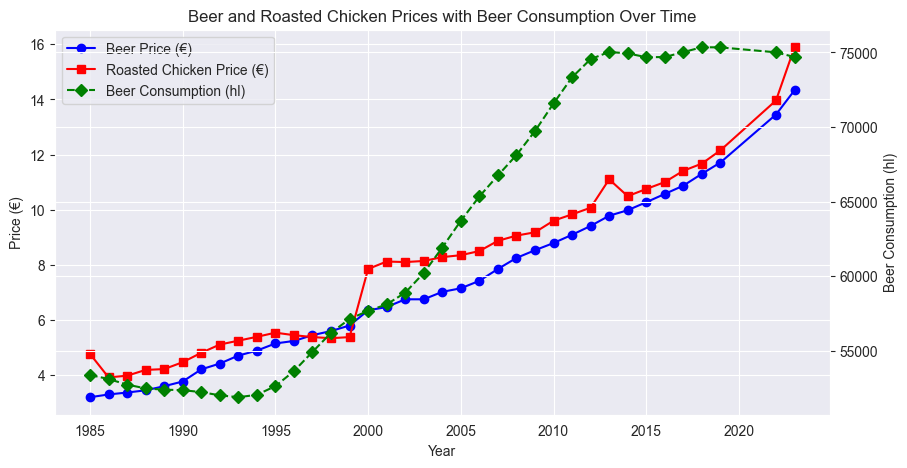

In [108]:
#**Plot Beer and Roasted Chicken Prices Over Time**

# Apply Gaussian smoothing to beer consumption
df["bier_konsum_smoothed"] = gaussian_filter1d(df["bier_konsum"], sigma=2)  # Adjust sigma for smoothness

# Create the figure
fig, ax1 = plt.subplots(figsize=(10, 5))

# ---- Primary Y-Axis: Beer and Roasted Chicken Prices ----
ax1.set_xlabel("Year")
ax1.set_ylabel("Price (€)")
ax1.set_title("Beer and Roasted Chicken Prices with Beer Consumption Over Time")

# Plot Beer Price
line1, = ax1.plot(df["jahr"], df["bier_preis"], marker="o", color="b", label="Beer Price (€)")

# Plot Roasted Chicken Price
line2, = ax1.plot(df["jahr"], df["hendl_preis"], marker="s", color="r", label="Roasted Chicken Price (€)")

ax1.grid(True)

# ---- Secondary Y-Axis: Smoothed Beer Consumption ----
ax2 = ax1.twinx()  # Create secondary Y-axis
ax2.set_ylabel("Beer Consumption (hl)")

# Plot Smoothed Beer Consumption
line3, = ax2.plot(df["jahr"], df["bier_konsum_smoothed"], marker="D", linestyle="dashed", color="g", label="Beer Consumption (hl)")

# ---- Combine Legends Correctly ----
# Collect all lines and labels
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]

# Set the correct legend
ax1.legend(lines, labels, loc="upper left")

# Show the plot
plt.show()

In [ ]:
### Task 3: Visualizing the Relationship Between Beer Price, Visitors, and Beer Consumption
**Create a Bubble Chart**
- Generate a **scatter plot** with:
  - **Total visitors (in millions) on the X-axis**
  - **Beer price (in €) on the Y-axis**
- Each point should **represent a year**, so color-code the points by year (`hue` parameter).

**Represent Beer Consumption with Bubble Size**
- The **bubble size should reflect beer consumption** (larger bubbles for higher beer consumption).
- Adjust the scaling so that differences in consumption are clearly visible but not overwhelming.

**Final Touches**
- Use **circular markers (`marker="o"`)** to ensure a clean and readable plot.
- Label both axes properly and add a **title**.
- Include a **legend** that differentiates the years.
- Apply **aesthetic improvements**, such as adjusting transparency (`alpha`) and adding gridlines for readability.


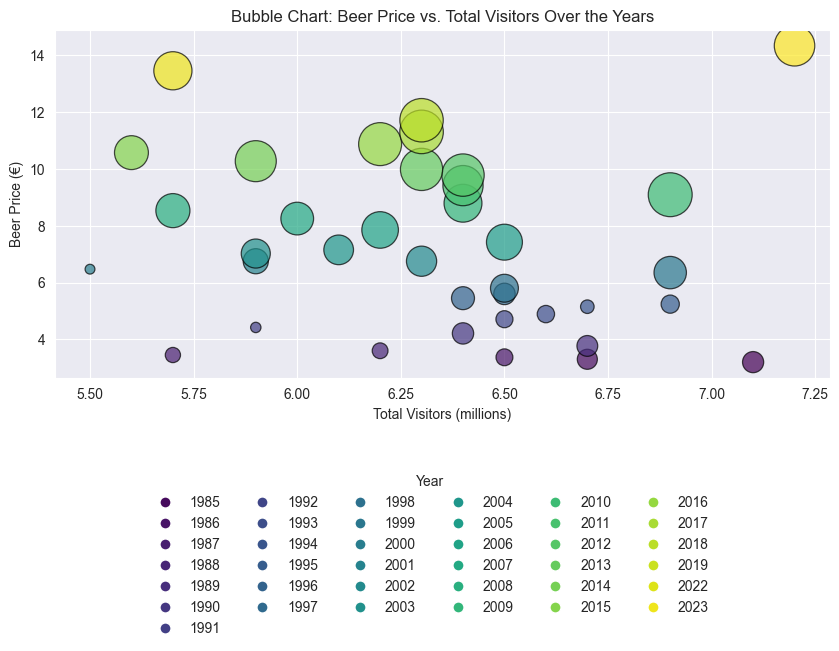

In [109]:
# Normalize bubble size for better visualization
bubble_size = df["bier_konsum"] / df["bier_konsum"].max() * 1000  # Scale bubble size

# Create the figure and scatter (bubble) plot
fig, ax = plt.subplots(figsize=(10, 6))

bubble_chart = sns.scatterplot(
    data=df,
    x="besucher_gesamt",  # Visitors (in millions)
    y="bier_preis",  # Beer Price (€)
    size=bubble_size,  # Bubble size reflects beer consumption
    sizes=(50, 1000),  # Adjust size range for better visualization
    hue="jahr",  # Color-code by year
    palette="viridis",  # Use a nice color gradient
    alpha=0.7,  # Transparency for better readability
    edgecolor="black",  # Black edge for better distinction
    legend=False  # Remove default legend inside chart
)

# Labels and Title
plt.xlabel("Total Visitors (millions)")
plt.ylabel("Beer Price (€)")
plt.title("Bubble Chart: Beer Price vs. Total Visitors Over the Years")
plt.grid(True)

# ---- Custom Year Legend Below Chart ----
# Get unique years and their colors from the "viridis" palette
unique_years = df["jahr"].astype(str).tolist()
year_colors = sns.color_palette("viridis", len(unique_years))

# Create year legend items
year_legend_patches = [Line2D([0], [0], marker='o', color='w', markerfacecolor=year_colors[i], markersize=8, label=unique_years[i])
                        for i in range(len(unique_years))]

# Move the legend **further down** to avoid overlap
plt.figlegend(handles=year_legend_patches, title="Year", loc="lower center", ncol=min(6, len(unique_years)), frameon=False, bbox_to_anchor=(0.5, -0.15))

# Adjust layout to ensure proper spacing
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin to prevent overlap

# Show the plot
plt.show()

 ##Lecture 5
 # Exercise: Working with DateTime Variables
In this task, you will work with **date and time data** in Pandas. The data set used contains counts of cyclists at various time intervals and locations in Munich. The data set contains the following variables:
- `“datum”` = date
- `“uhrzeit_start”` = start of the measurement interval
- `“uhrzeit_ende”` = end of the measurement interval
- `“richtung_1”` = direction of travel 1 of the cyclist
- `“richtung_2”` = direction of travel 2 of the cyclist
- `“total”` = total number of cyclists in a time interval

In [111]:
import pandas as pd

df = pd.read_csv('rad_15min_condensed.csv')
print(df.head())
print(df.dtypes)  # Check column data types

        datum uhrzeit_start uhrzeit_ende zaehlstelle  richtung_1  richtung_2  \
0  2022.11.01         06:15        06:30    Kreuther         0.0         0.0   
1  2022.11.01         06:15        06:30  Margareten         3.0         1.0   
2  2022.11.01         06:15        06:30     Olympia         0.0         0.0   
3  2022.11.01         06:30        06:45      Arnulf         6.0         0.0   
4  2022.11.01         06:30        06:45     Erhardt         1.0         1.0   

   gesamt  
0     0.0  
1     4.0  
2     0.0  
3     6.0  
4     2.0  
datum             object
uhrzeit_start     object
uhrzeit_ende      object
zaehlstelle       object
richtung_1       float64
richtung_2       float64
gesamt           float64
dtype: object


In [112]:
import pandas as pd

#  Convert 'datum' from 'YYYY.MM.DD' format to datetime
df['datum'] = pd.to_datetime(df['datum'], format='%Y.%m.%d', errors='coerce')

#  Ensure 'uhrzeit_start' is a string & clean spaces
df['uhrzeit_start'] = df['uhrzeit_start'].astype(str).str.strip()

# 3Convert 'uhrzeit_start' to time format (HH:MM)
df['uhrzeit_start'] = pd.to_datetime(df['uhrzeit_start'], format='%H:%M', errors='coerce')

# 4Extract only the time part
df['uhrzeit_start'] = df['uhrzeit_start'].dt.time

# Merge 'datum' and 'uhrzeit_start' into 'datetime_start'
df['datetime_start'] = df.apply(
    lambda row: pd.Timestamp.combine(row['datum'], row['uhrzeit_start'])
    if pd.notna(row['datum']) and pd.notna(row['uhrzeit_start']) else pd.NaT, axis=1
)

# Check the final result
print(df[['datum', 'uhrzeit_start', 'datetime_start']].head())

       datum uhrzeit_start      datetime_start
0 2022-11-01      06:15:00 2022-11-01 06:15:00
1 2022-11-01      06:15:00 2022-11-01 06:15:00
2 2022-11-01      06:15:00 2022-11-01 06:15:00
3 2022-11-01      06:30:00 2022-11-01 06:30:00
4 2022-11-01      06:30:00 2022-11-01 06:30:00


In [113]:
# Ensure 'uhrzeit_start' is a string & clean spaces
df['uhrzeit_ende'] = df['uhrzeit_ende'].astype(str).str.strip()

# Convert 'uhrzeit_start' to time format (HH:MM)
df['uhrzeit_ende'] = pd.to_datetime(df['uhrzeit_ende'], format='%H:%M', errors='coerce')

# Extract only the time part
df['uhrzeit_ende'] = df['uhrzeit_ende'].dt.time

# Merge 'datum' and 'uhrzeit_start' into 'datetime_start'
df['datetime_ende'] = df.apply(
    lambda row: pd.Timestamp.combine(row['datum'], row['uhrzeit_ende'])
    if pd.notna(row['datum']) and pd.notna(row['uhrzeit_ende']) else pd.NaT, axis=1
)

#  Check the final result
print(df[['datum', 'uhrzeit_ende', 'datetime_ende']].head())

       datum uhrzeit_ende       datetime_ende
0 2022-11-01     06:30:00 2022-11-01 06:30:00
1 2022-11-01     06:30:00 2022-11-01 06:30:00
2 2022-11-01     06:30:00 2022-11-01 06:30:00
3 2022-11-01     06:45:00 2022-11-01 06:45:00
4 2022-11-01     06:45:00 2022-11-01 06:45:00


In [ ]:
## Task 1
**Creating Time Variables**
- Use the columns **`datum` (date)** and **`uhrzeit_start` (start time)** to create a new column called **`datetime_start`**.
- Similarly, combine **`datum` (date)** and **`uhrzeit_ende` (end time)** into a new **`datetime_end`** column.
- Make sure that the variables is in the correct **datetime format**.
- After successfully creating `datetime_start` and `datetime_end`, **remove the original columns** (`datum`, `uhrzeit_start`, and `uhrzeit_ende`) from the dataset.

In [114]:
# Combine 'datum' and 'uhrzeit_start' into 'datetime_start'
df['datetime_start'] = df.apply(
    lambda row: pd.Timestamp.combine(row['datum'], row['uhrzeit_start'])
    if pd.notna(row['datum']) and pd.notna(row['uhrzeit_start']) else pd.NaT, axis=1
)

# Display the updated DataFrame
print(df[['datum', 'uhrzeit_start', 'datetime_start']].head())

       datum uhrzeit_start      datetime_start
0 2022-11-01      06:15:00 2022-11-01 06:15:00
1 2022-11-01      06:15:00 2022-11-01 06:15:00
2 2022-11-01      06:15:00 2022-11-01 06:15:00
3 2022-11-01      06:30:00 2022-11-01 06:30:00
4 2022-11-01      06:30:00 2022-11-01 06:30:00


In [115]:
# Combine 'datum' and 'uhrzeit_ende' into 'datetime_start'
df['datetime_ende'] = df.apply(
    lambda row: pd.Timestamp.combine(row['datum'], row['uhrzeit_ende'])
    if pd.notna(row['datum']) and pd.notna(row['uhrzeit_ende']) else pd.NaT, axis=1
)

# Display the updated DataFrame
print(df[['datum', 'uhrzeit_ende', 'datetime_ende']].head())

       datum uhrzeit_ende       datetime_ende
0 2022-11-01     06:30:00 2022-11-01 06:30:00
1 2022-11-01     06:30:00 2022-11-01 06:30:00
2 2022-11-01     06:30:00 2022-11-01 06:30:00
3 2022-11-01     06:45:00 2022-11-01 06:45:00
4 2022-11-01     06:45:00 2022-11-01 06:45:00


In [116]:
# Remove the original columns after creating 'datetime_start' and 'datetime_end'
df.drop(columns=['datum', 'uhrzeit_start', 'uhrzeit_ende'], inplace=True)

# Display the updated DataFrame
print(df.head())  # Check the first few rows

  zaehlstelle  richtung_1  richtung_2  gesamt      datetime_start  \
0    Kreuther         0.0         0.0     0.0 2022-11-01 06:15:00   
1  Margareten         3.0         1.0     4.0 2022-11-01 06:15:00   
2     Olympia         0.0         0.0     0.0 2022-11-01 06:15:00   
3      Arnulf         6.0         0.0     6.0 2022-11-01 06:30:00   
4     Erhardt         1.0         1.0     2.0 2022-11-01 06:30:00   

        datetime_ende  
0 2022-11-01 06:30:00  
1 2022-11-01 06:30:00  
2 2022-11-01 06:30:00  
3 2022-11-01 06:45:00  
4 2022-11-01 06:45:00  


## Task 2
In this task, you will analyze time-based trends in cycling data: determine **the peak hour for each counting station ("zaehlstelle")** based on the total number of cyclists recorded. Your result should be a dataframe showing:
 - The **counting station (`zaehlstelle`)**
  - The **peak hour (`peakhour`)**
    - The **total number of cyclists during that peak hour (`total_cyclists_peakhour`)**



In [117]:
# Extract hour from 'datetime_start'
df['hour'] = df['datetime_start'].dt.hour

# Group by 'zaehlstelle' and 'hour' and sum total cyclists
peak_df = df.groupby(['zaehlstelle', 'hour'])['gesamt'].sum().reset_index()

# Find the peak hour for each counting station
peak_df = peak_df.loc[peak_df.groupby('zaehlstelle')['gesamt'].idxmax()]

# Rename columns for clarity
peak_df = peak_df.rename(columns={'hour': 'peakhour', 'gesamt': 'total_cyclists_peakhour'})

# Display the result
print(peak_df.head())  # Use print instead of ace_tools

    zaehlstelle  peakhour  total_cyclists_peakhour
8        Arnulf         8                  97928.0
42      Erhardt        18                 314197.0
56       Hirsch         8                 148568.0
79     Kreuther         7                  15395.0
113  Margareten        17                 160978.0


g

## Task 3
Analyze the dataset to determine whether the number of cyclists follows a **trend** or exhibits **seasonal patterns**.

1. **Trend Analysis**
Investigate if the cyclist count follows an increasing or decreasing trend.
- Compute a **7-day moving average** to smooth out short-term fluctuations.
- Plot both the **original data** and the **moving average**.

2. **Apply Differencing to Remove Trends**
- Compute the **first-order difference** of the data.
- Plot the differenced data and analyze whether the trend is removed.

3. **Compute ACF & PACF**
- **Autocorrelation Function (ACF):** Detect repeating cycles (e.g., daily or weekly patterns).
- **Partial Autocorrelation Function (PACF):** Identify significant lags that influence future values.

**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**
- **Is there a repeating pattern in the data?**
- **What do the ACF/PACF plots suggest about seasonal effects?**


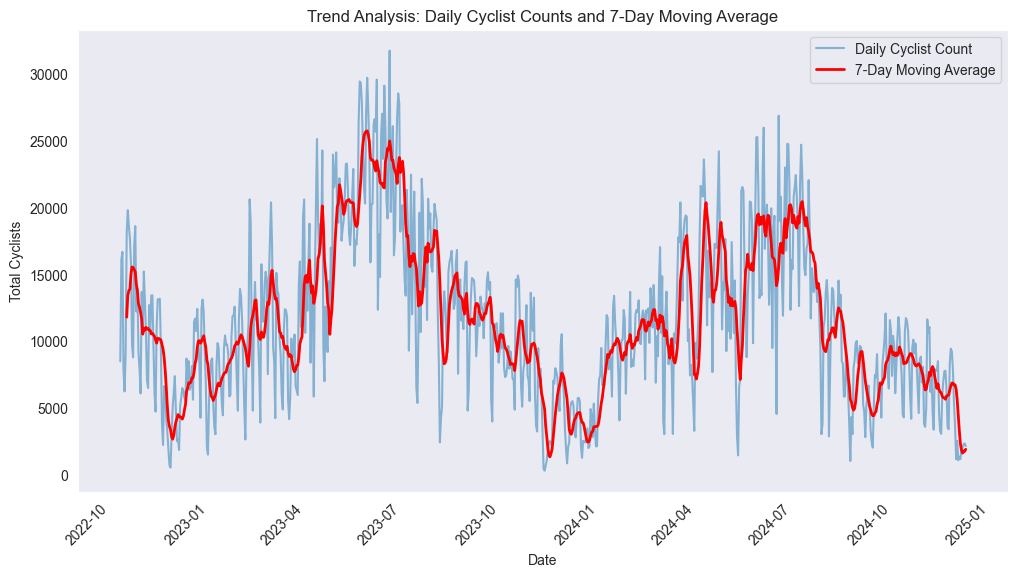

In [118]:
#1. Trend Analysis

import matplotlib.pyplot as plt

# Extract the date part for daily aggregation
df['date'] = df['datetime_start'].dt.date

# Aggregate total cyclists per day
daily_counts = df.groupby('date')['gesamt'].sum().reset_index()

# Compute the 7-day moving average
daily_counts['7_day_moving_avg'] = daily_counts['gesamt'].rolling(window=7).mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_counts['date'], daily_counts['gesamt'], label='Daily Cyclist Count', alpha=0.5)
plt.plot(daily_counts['date'], daily_counts['7_day_moving_avg'], label='7-Day Moving Average', linewidth=2, color='red')

# Formatting
plt.xlabel('Date')
plt.ylabel('Total Cyclists')
plt.title('Trend Analysis: Daily Cyclist Counts and 7-Day Moving Average')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

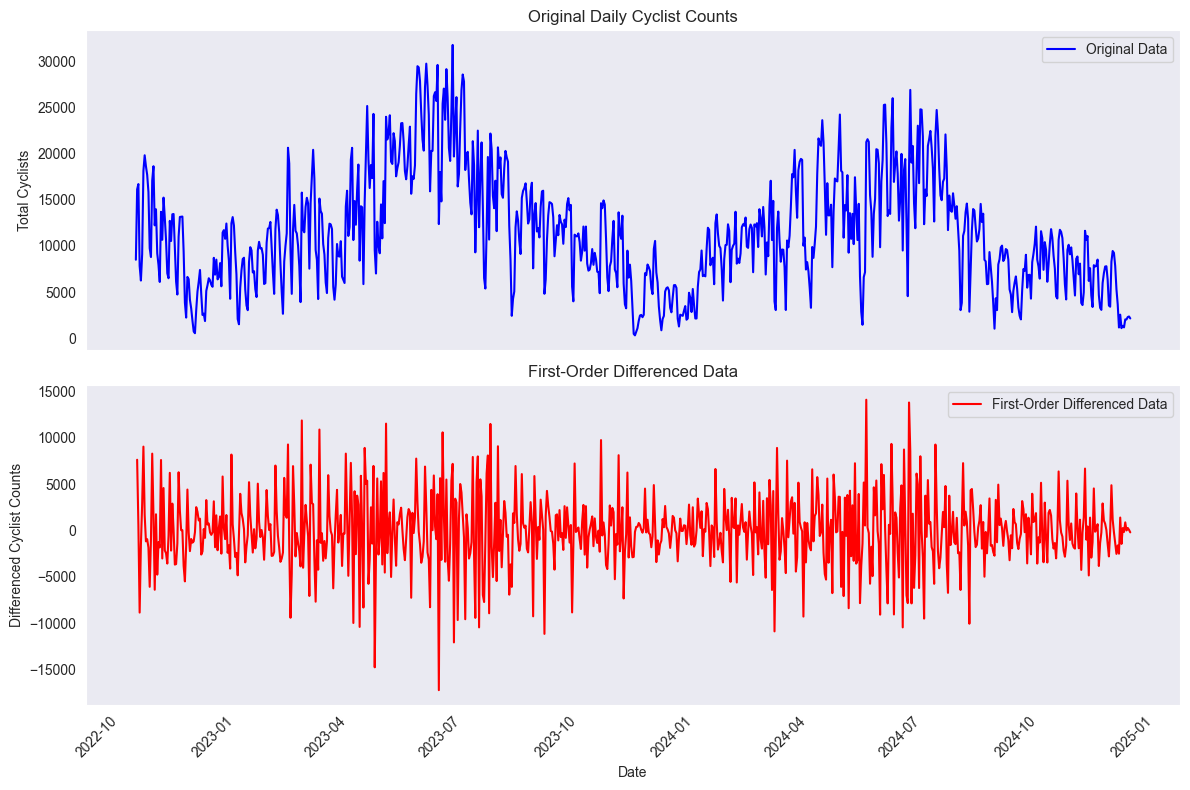

In [119]:
#2. **Apply Differencing to Remove Trends**
# Extract the date part for daily aggregation
df['date'] = df['datetime_start'].dt.date

# Aggregate total cyclists per day
daily_counts = df.groupby('date')['gesamt'].sum().reset_index()

# Compute first-order differencing
daily_counts['first_order_diff'] = daily_counts['gesamt'].diff()

# Plot the original and differenced data
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Original data
ax[0].plot(daily_counts['date'], daily_counts['gesamt'], label='Original Data', color='blue')
ax[0].set_title('Original Daily Cyclist Counts')
ax[0].set_ylabel('Total Cyclists')
ax[0].legend()
ax[0].grid()

# Differenced data
ax[1].plot(daily_counts['date'], daily_counts['first_order_diff'], label='First-Order Differenced Data', color='red')
ax[1].set_title('First-Order Differenced Data')
ax[1].set_ylabel('Differenced Cyclist Counts')
ax[1].legend()
ax[1].grid()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Date')

# Show plot
plt.tight_layout()
plt.show()

In [120]:
print(df.head())

  zaehlstelle  richtung_1  richtung_2  gesamt      datetime_start  \
0    Kreuther         0.0         0.0     0.0 2022-11-01 06:15:00   
1  Margareten         3.0         1.0     4.0 2022-11-01 06:15:00   
2     Olympia         0.0         0.0     0.0 2022-11-01 06:15:00   
3      Arnulf         6.0         0.0     6.0 2022-11-01 06:30:00   
4     Erhardt         1.0         1.0     2.0 2022-11-01 06:30:00   

        datetime_ende  hour        date  
0 2022-11-01 06:30:00     6  2022-11-01  
1 2022-11-01 06:30:00     6  2022-11-01  
2 2022-11-01 06:30:00     6  2022-11-01  
3 2022-11-01 06:45:00     6  2022-11-01  
4 2022-11-01 06:45:00     6  2022-11-01  



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


<Figure size 1400x800 with 0 Axes>

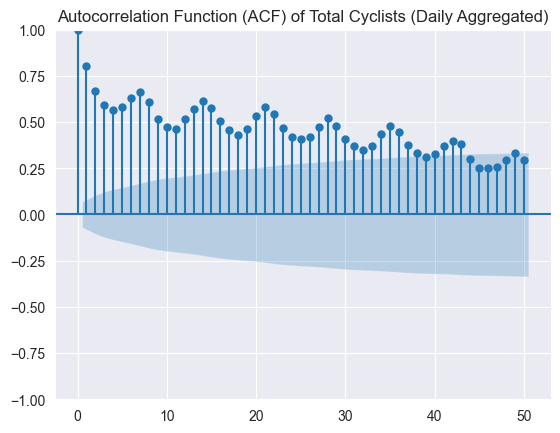

In [122]:
#3.
!pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Resample data to daily frequency ('D') and sum total cyclists
daily_counts = df.resample('D', on='datetime_start')['gesamt'].sum()

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(14, 8))
plot_acf(daily_counts, lags=50)  # 50 lags to check short-term correlation
plt.title("Autocorrelation Function (ACF) of Total Cyclists (Daily Aggregated)")
plt.show()

<Figure size 1200x500 with 0 Axes>

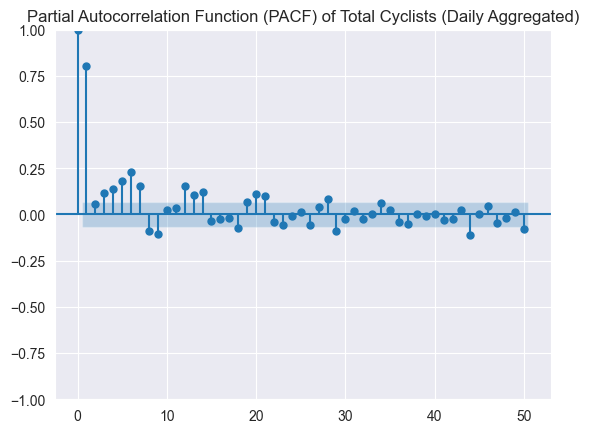

In [123]:
# Plot Partial Autocorrelation Function (PACF)
# Resample data to daily frequency ('D') and sum total cyclists
daily_counts = df.resample('D', on='datetime_start')['gesamt'].sum()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(daily_counts, lags=50)  # 50 lags to check direct effects
plt.title("Partial Autocorrelation Function (PACF) of Total Cyclists (Daily Aggregated)")
plt.show()

**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**

There is no consistent increasing or decreasing trend, but rather recurring cycles.

- **Is there a repeating pattern in the data?**

Yes, in the first plot we can clearly see that the number of cyclists increases between the months of March, reaches its peak in July and then starts to decrease in October

- **What do the ACF/PACF plots suggest about seasonal effects?**

Seasonal Effects from ACF Plot
- Cycling activity follows a weekly pattern. The peaks at some particular lags indicate that cyclist numbers tend to repeat every week.
- Gradual decreases in correlation suggest possible monthly or seasonal trends.
- Strong autocorrelations show that cycling follows predictable seasonal cycles rather than fluctuating randomly.
Seasonal Effects from PACF Plot
- The strongest seasonal effect is weekly – Significant spikes at lags 7, 14 confirm that weekly trends influence cycling behavior.
- After a few weeks, the correlations weaken, suggesting that seasonal patterns mostly repeat in the short term.

In [ ]:
## Lecture 6
## Task 1: Tumor Classification using K-Nearest Neighbors (KNN)
Classify tumors as **Benign** or **Malignant** based on patient characteristics using **K-Nearest Neighbors (KNN)**.

1. **Preprocessing**
   - Encode categorical variables (`Gender`, `Location`, `Histology`, etc.).
   - Scale numerical features (`Age`, `Tumor_Size`, `Tumor_Growth_Rate`).
   - Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
   - Train a **K-Nearest Neighbors (KNN) classifier** to predict `Tumor_Type` (`Benign` or `Malignant`).
   - Perform **hyperparameter tuning** to find the best `k`.

3. **Model Evaluation**:
   - Plot the **confusion matrix** and **classification report**.
   - Compare accuracy for different values of `k` using a **line plot**.

Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.


In [124]:

# Supervised learning

## In this exercise you will be given two data sets each of which you are to use to calculate a supervised learning model.

!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Load the dataset in pandas.

# Load Excel file () and check basic info
df = pd.read_csv("brain_tumor_dataset.csv")

print(df.shape)
print(df.info())
print(df.head())



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
(20000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherap

In [125]:
## ### Task 1: Tumor Classification using K-Nearest Neighbors (KNN)

## Classify tumors as **Benign** or **Malignant** based on patient characteristics using **K-Nearest Neighbors (KNN)**.

### 1. **Preprocessing**
# i. Encode categorical variables (`Gender`, `Location`, `Histology`, etc.).
# ii. Scale numerical features (`Age`, `Tumor_Size`, `Tumor_Growth_Rate`).
# iii. Split the dataset into **training (80%)** and **testing (20%)** sets.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Step 1: Encode Categorical Variables

categorical_cols = ["Gender", "Tumor_Type", "Location", "Histology", "Stage", 
                    "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment", 
                    "Surgery_Performed", "Chemotherapy", "Family_History", 
                    "MRI_Result", "Follow_Up_Required"]

# Apply Label Encoding
label_encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform categorical to numeric
    label_encoders[col] = le  # code for potential inverse transformation

### Step 2: Scale Numerical Features

numerical_cols = ["Age", "Tumor_Size", "Tumor_Growth_Rate"]

# Initialize Standard Scaler to normalize numerical features, improve  model stability, training efficiency, and overall predictive accuracy
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### Step 3: Split Data into Training & Testing Sets
# assuming 'Survival_Rate' is the target

X = df.drop(columns=["Survival_Rate"])  # Features
y = df["Survival_Rate"]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shape after split
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (16000, 18)
Testing Data Shape: (4000, 18)


In [126]:
### 2. **Model Implementation**

# i. Train a **K-Nearest Neighbors (KNN) classifier** to predict `Tumor_Type` (`Benign` or `Malignant`).
# ii. Perform **hyperparameter tuning** to find the best `k`.


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode 'Tumor_Type' (Benign -> 0, Malignant -> 1)
label_encoder = LabelEncoder()
df["Tumor_Type"] = label_encoder.fit_transform(df["Tumor_Type"])

# drop Patient_ID as it's irrelevant 
X = df.drop(columns=["Tumor_Type", "Patient_ID"])  
y = df["Tumor_Type"]

# Scale numerical columns
scaler = StandardScaler()
numerical_cols = ["Age", "Tumor_Size", "Tumor_Growth_Rate"]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Perform Hyperparameter Tuning to Find the Best k

# Define parameter grid for 'k'
param_grid = {"n_neighbors": np.arange(1, 21)}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best K value
best_k = grid_search.best_params_["n_neighbors"]
print(f"Best k: {best_k}")

# Train the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict with the optimized model
y_pred_best = best_knn.predict(X_test)

# Evaluate optimized model
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))


# Result: Poor Model Performance: The model does not distinguish well between benign and malignant tumors.
# becauseas model correctly classifies tumor types only 50.72% of the time, which is just slightly better than random guessing (50%).

Accuracy: 0.5072
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1994
           1       0.51      0.50      0.50      2006

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000

Best k: 18
Optimized Accuracy: 0.4890
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      1994
           1       0.49      0.39      0.44      2006

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.48      4000
weighted avg       0.49      0.49      0.48      4000



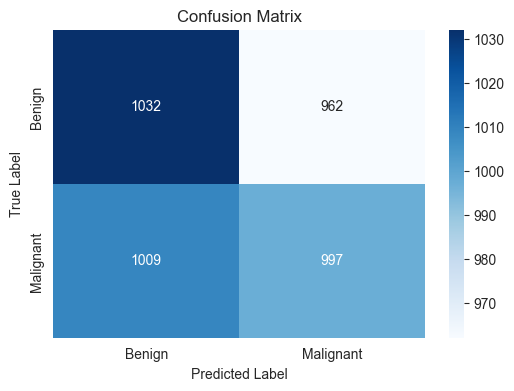

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1994
           1       0.51      0.50      0.50      2006

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



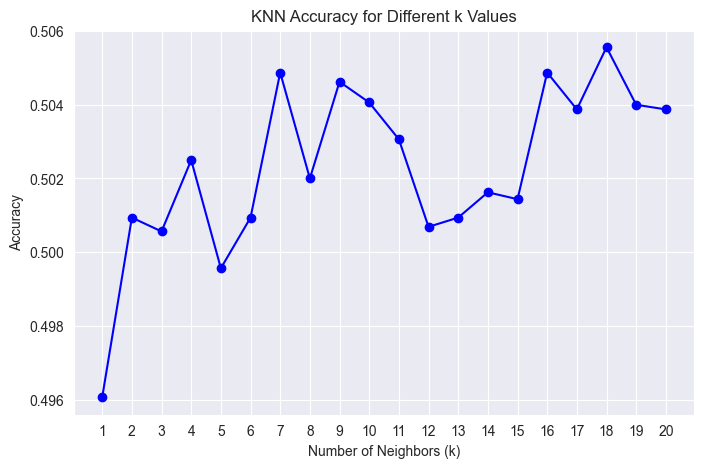

In [127]:
######  3. **Model Evaluation**:
# i. Plot the **confusion matrix** and **classification report**.
# ii. Compare accuracy for different values of `k` using a **line plot**.
   
# Generate confusion matrix to visualizes model errors (false positives/negatives).
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix to visualize model errors (false positives/negatives)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report to evaluate how well the model predicts Benign (0) vs. Malignant (1) tumors.
print("Classification Report:")
print(classification_report(y_test, y_pred))


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define range of k values to identify best k for optimal accuracy.
k_values = range(1, 21)  # Testing k from 1 to 20
accuracy_scores = []

# Train & evaluate KNN for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")  
    accuracy_scores.append(scores.mean())  # Store mean accuracy

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()



In [ ]:
###. Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.
Based on the classification report and accuracy values, the model's performance is relatively poor as model correctly predicted the class (either benign or malignant) only 51% of the time that not reliable for classification tasks.

## Task 2
The goal of this exercise is to predict **Life Expectancy** (`Life expectancy`) based on various health, economic, and demographic factors using **Linear Regression**. The model should be optimized using **Ridge and Lasso Regression**.

1. **Preprocessing**
- Remove irrelevant columns (`Country`, `Year`).
- Encode categorical variables (`Status`).
- Handle missing values appropriately.
- Standardize numerical features (e.g., `GDP`, `Schooling`, `Alcohol`) using `StandardScaler`.
- Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
- Train a **basic Linear Regression** model and evaluate its performance.
- Implement **Ridge Regression** and **Lasso Regression**, tuning the `alpha` hyperparameter using **cross-validation**.

3. **Model Evaluation**:
- Compute the **Root Mean Squared Error (MSE)** for all models.
- Compare Ridge and Lasso performance to determine if regularization improves results.
- Plot **actual vs. predicted life expectancy** scores for each model.

In [136]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [139]:
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns if they exist
df = df.drop(columns=["Country", "Year"], errors='ignore')

# Encode 'Status' (Developed / Developing) using LabelEncoder
label_encoder = LabelEncoder()
df["Status"] = label_encoder.fit_transform(df["Status"])


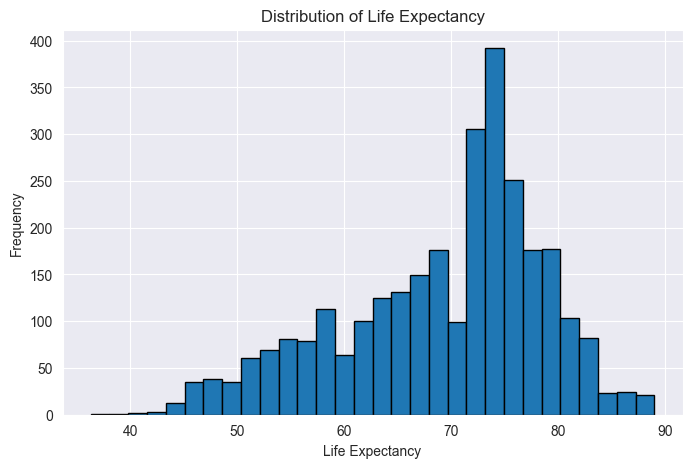

In [142]:
#Check the distribution to decide what to do with the missing values
import matplotlib.pyplot as plt

# Clean column names: remove leading/trailing spaces, replace spaces with underscores, and lowercase
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Check if 'life_expectancy' exists before plotting
if "life_expectancy" in df.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df["life_expectancy"].dropna(), bins=30, edgecolor='black')  # dropna to avoid issues with NaNs
    plt.title("Distribution of Life Expectancy")
    plt.xlabel("Life Expectancy")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
else:
    print("Column 'life_expectancy' not found. Available columns are:", df.columns.tolist())


In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Clean column names: lowercase, strip, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Drop missing values
df = df.dropna()

# Step 3: Separate features and target
X = df.drop(columns=["life_expectancy"])
y = df["life_expectancy"]

# Step 4: Standardize selected numeric features (also make sure the names match cleaned columns)
numeric_features = ["gdp", "schooling", "alcohol"]
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Print shapes to verify
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1319, 19)
Testing set shape: (330, 19)


In [148]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Basic Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("🔹 Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

🔹 Linear Regression:
R² Score: 0.8105119533364785
MSE: 13.457911853528191


In [149]:
# Ridge Regression with cross-validation
ridge_alphas = np.logspace(-3, 3, 50)
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)

print("\n🔹 Ridge Regression:")
print("Best alpha:", ridge_cv.alpha_)
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression with cross-validation
lasso_cv = LassoCV(alphas=ridge_alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

print("\n🔹 Lasso Regression:")
print("Best alpha:", lasso_cv.alpha_)
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))

/Users/emilymatos/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.67845e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/emilymatos/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.41409e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/emilymatos/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.51704e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/emilymatos/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.16844e-18): result may no


🔹 Ridge Regression:
Best alpha: 4.714866363457395
R² Score: 0.8075963240652063
MSE: 13.664987088199982

🔹 Lasso Regression:
Best alpha: 0.012648552168552958
R² Score: 0.8095091888810488
MSE: 13.529130676502223


In [150]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# 1️⃣ Compute Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("\n📊 RMSE Comparison:")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")


📊 RMSE Comparison:
Linear Regression RMSE: 3.67
Ridge Regression RMSE: 3.70
Lasso Regression RMSE: 3.68



 Best model based on RMSE: Linear (RMSE = 3.67)


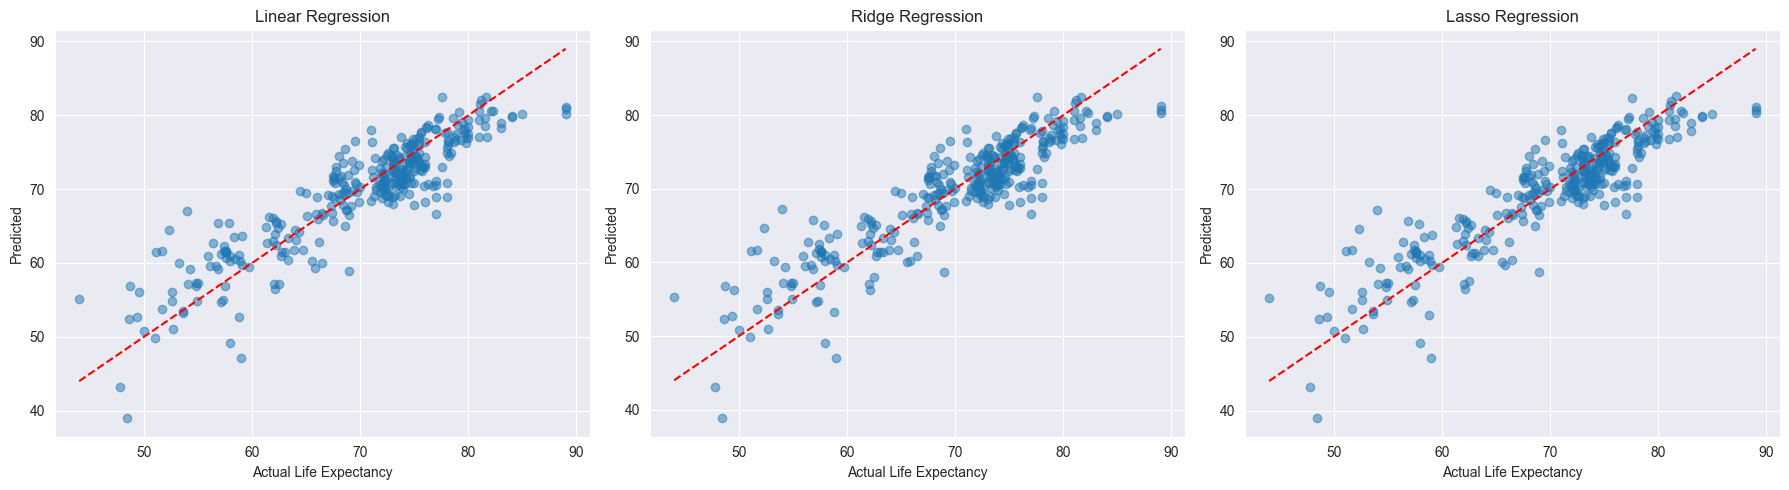

In [151]:
# Compare performance
best_model = min(
    [("Linear", rmse_lr), ("Ridge", rmse_ridge), ("Lasso", rmse_lasso)],
    key=lambda x: x[1]
)
print(f"\n Best model based on RMSE: {best_model[0]} (RMSE = {best_model[1]:.2f})")
# Plot Actual vs. Predicted for each model
plt.figure(figsize=(18, 5))

models = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso
}

for i, (name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Life Expectancy")
    plt.ylabel("Predicted")
    plt.title(name)

plt.tight_layout()
plt.show()

## Lecture 7
# Exercise: Hierarchical Cluster Analysis
You are provided with a dataset containing demographic indicators for 36 European countries. These include variables such as:

- birth and death rates
- male and female life expectancy
- total population and population density

Your goal is to uncover clusters of countries that share similar demographic profiles. To do this, proceed as follows:

- Design and implement a **machine learning pipeline** that prepares your data for clustering.
- Use **PCA** to reduce the dimensionality of the data and support your interpretation.
- Apply **hierarchical clustering** to identify meaningful groups of countries.
- Visualize your results using a **dendrogram** and a **PCA scatterplot**, and analyze the outcome.
- Investigate and compare **different linkage methods** (`ward`, `complete`, `average`, etc.). Justify your final choice.
- Characterize each resulting cluster: What do the countries in each group have in common? How do they differ from others?

In [153]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Load the dataset in pandas.

# Load Excel file (europe_demo_cleaned) and check basic info
df = pd.read_csv("europe_demo_cleaned.csv")

print(df.shape)
print(df.info())
print(df.head())



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
(36, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_name            36 non-null     object 
 1   birth_rate              36 non-null     float64
 2   death_rate              36 non-null     float64
 3   male_life_expectancy    36 non-null     float64
 4   female_life_expectancy  36 non-null     float64
 5   population              36 non-null     float64
 6   population_per_sq_km    36 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB
None
    country_name  birth_rate  death_rate  male_life_expectancy  \
0        Austria         9.4        10.3                  78.9   
1        Belgium         9.9        11.0                  78.6   
2         France        10.9         9.9     

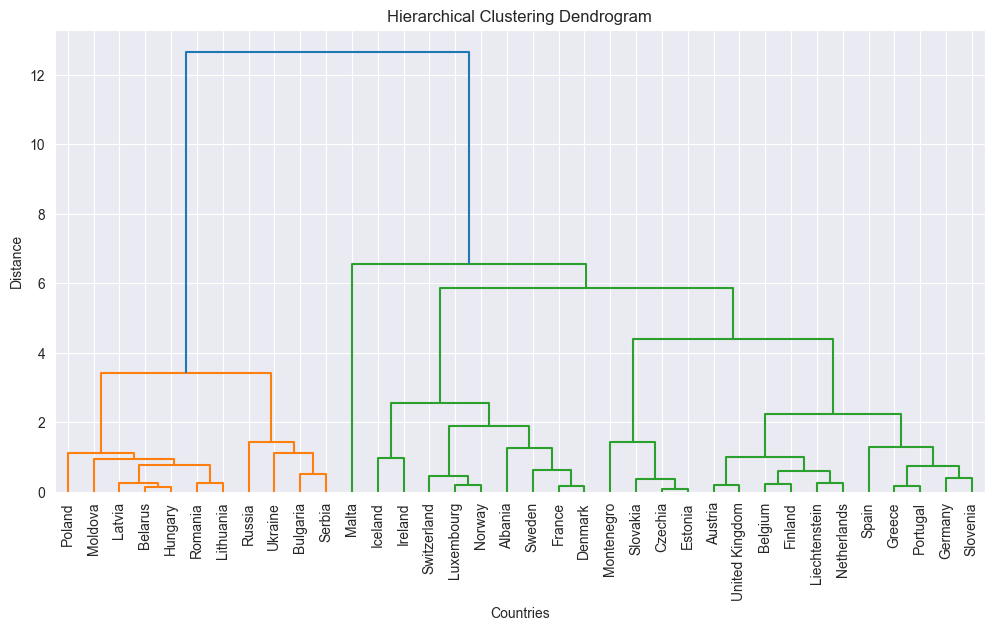

In [154]:
### Exercise: Hierarchical Cluster Analysis
# You are provided with a dataset containing demographic indicators for 36 European countries. These include variables such as:

# birth and death rates
# male and female life expectancy
# total population and population density

### Your goal is to uncover clusters of countries that share similar demographic profiles. To do this, proceed as follows:

### Design and implement a **machine learning pipeline** that prepares your data for clustering.

# i. Use **PCA** to reduce the dimensionality of the data and support your interpretation.


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


# Drop non-numeric columns (country names)
df_numeric = df.drop(columns=["country_name"])

# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # for 2 dimensions for visualization
df_pca = pca.fit_transform(df_scaled)

# Convert PCA results into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

# Perform hierarchical clustering
linkage_matrix = linkage(df_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df["country_name"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

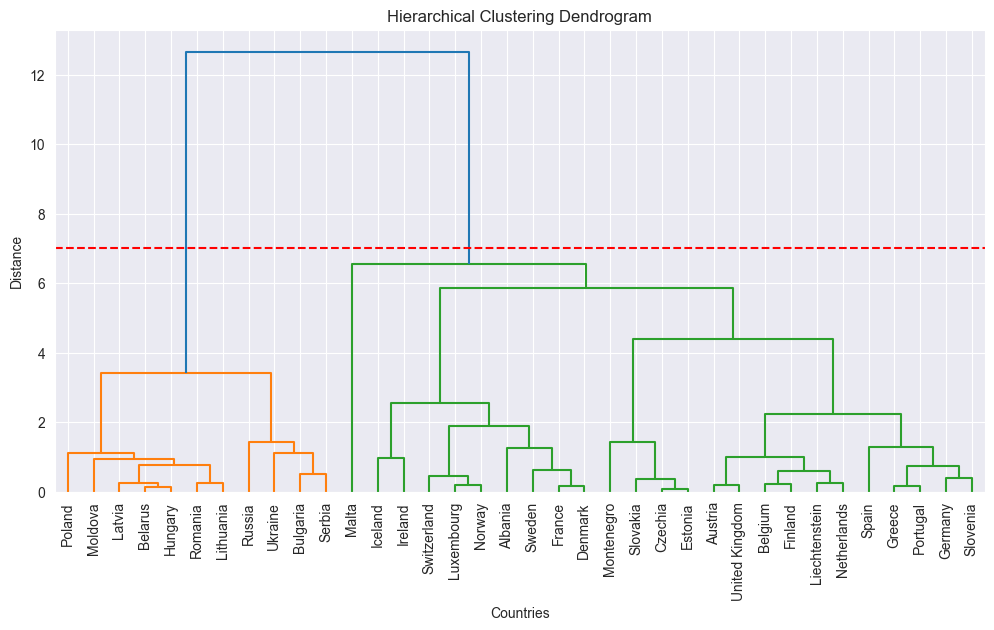

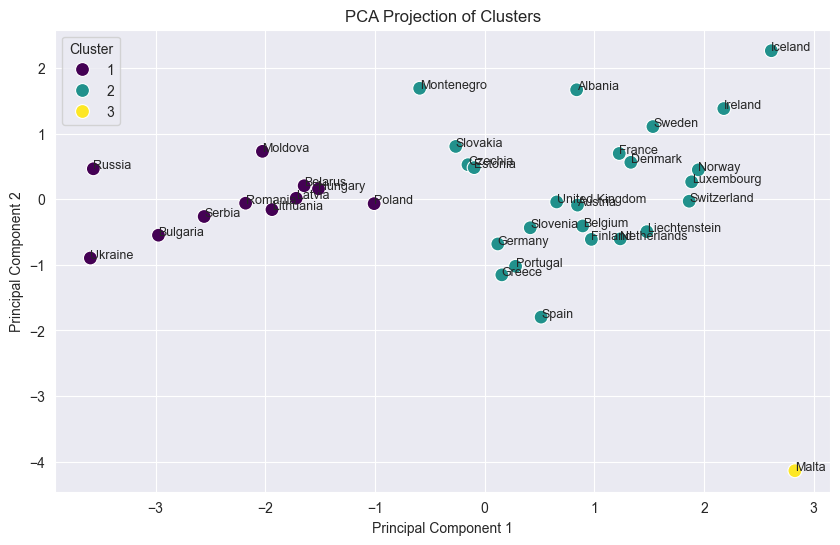

In [155]:
# ii. Apply **hierarchical clustering** to identify meaningful groups of countries.
# iii. Visualize your results using a **dendrogram** and a **PCA scatterplot**, and analyze the outcome.
from scipy.cluster.hierarchy import fcluster

# Step 1: Standardize the numerical data
df_numeric = df.drop(columns=["country_name"])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 2: Reduce dimensions using PCA (Optional for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

# Step 3: Perform Hierarchical Clustering
linkage_matrix = linkage(df_pca, method='ward')

# Step 4: Plot Dendrogram to determine the number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df["country_name"].values, leaf_rotation=90, leaf_font_size=10)
plt.axhline(y=7, color='r', linestyle='--')  # Adjust threshold line if needed
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

# Step 5: Assign clusters based on dendrogram cutoff
num_clusters = 3  # Adjust based on dendrogram insights
df["Cluster"] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 6: Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df["Cluster"], palette="viridis", s=100)
for i, country in enumerate(df["country_name"]):
    plt.text(df_pca["PC1"][i], df_pca["PC2"][i], country, fontsize=9)
plt.title("PCA Projection of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

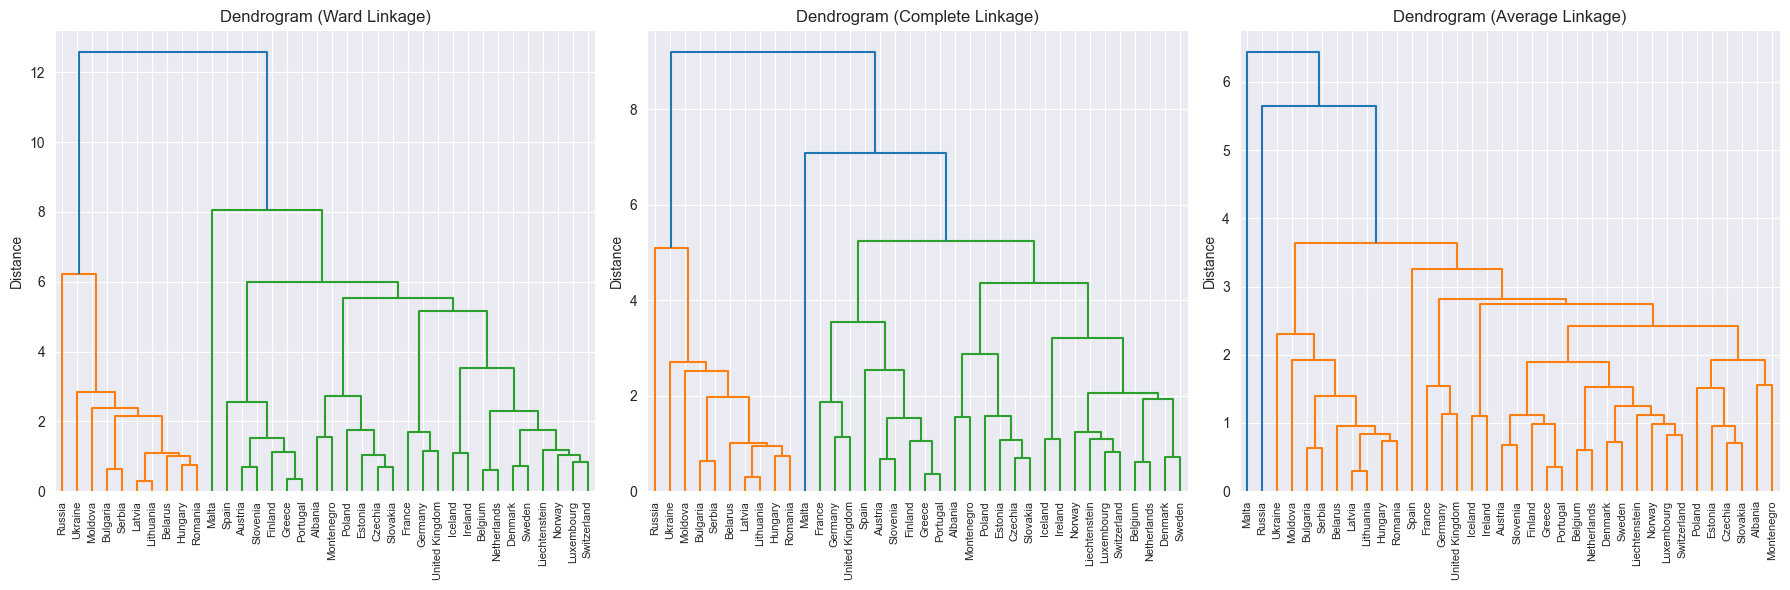

,country_name,Cluster_Ward,Cluster_Complete,Cluster_Average
0,Austria,2,2,1
1,Belgium,2,2,1
2,France,2,2,1
3,Germany,2,2,1
4,Liechtenstein,2,2,1


In [156]:
# iv. Investigate and compare **different linkage methods** (`ward`, `complete`, `average`, etc.). Justify your final choice.

# Compute linkage matrices using different methods
linkage_ward = linkage(df_scaled, method='ward')       # Ward's method to minimizes variance within clusters,
linkage_complete = linkage(df_scaled, method='complete')  # Complete linkage to maximizes the distance between clusters
linkage_average = linkage(df_scaled, method='average')   # Average linkage to considers average distances and for balanced clustering.


# Plot dendrograms for each linkage method
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

methods = ['ward', 'complete', 'average']
linkages = [linkage_ward, linkage_complete, linkage_average]

for ax, method, link_matrix in zip(axes, methods, linkages):
    ax.set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    dendrogram(link_matrix, labels=df["country_name"].values, leaf_rotation=90, leaf_font_size=8, ax=ax)
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()


num_clusters = 3  # Set the desired number of clusters based on dendrogram insights

df["Cluster_Ward"] = fcluster(linkage_ward, num_clusters, criterion='maxclust')
df["Cluster_Complete"] = fcluster(linkage_complete, num_clusters, criterion='maxclust')
df["Cluster_Average"] = fcluster(linkage_average, num_clusters, criterion='maxclust')

# Display the first few rows with assigned clusters
df[["country_name", "Cluster_Ward", "Cluster_Complete", "Cluster_Average"]].head()


# Final Choice: Ward's method usually give more compact and interpretable clusters compared to complete or average linkage and also less prone to chaining effects, that happens in complete and average linkage methods.

              birth_rate  death_rate  male_life_expectancy  \
Cluster_Ward                                                 
1                  9.110       15.09                69.500   
2                  9.864       10.00                78.328   
3                  8.600        7.90                80.800   

              female_life_expectancy  population  population_per_sq_km  
Cluster_Ward                                                            
1                             78.060  24777500.0              60.25580  
2                             83.252  17068693.0             136.74712  
3                             84.600    515332.0            1610.00000  


/var/folders/lm/tgd9q6xn3vv6z1_vz6ncjpk80000gn/T/ipykernel_95277/1786774255.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster_Ward"], y=df[feature], ax=ax, palette="viridis")
/var/folders/lm/tgd9q6xn3vv6z1_vz6ncjpk80000gn/T/ipykernel_95277/1786774255.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster_Ward"], y=df[feature], ax=ax, palette="viridis")
/var/folders/lm/tgd9q6xn3vv6z1_vz6ncjpk80000gn/T/ipykernel_95277/1786774255.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster_Ward"], y=df[feature

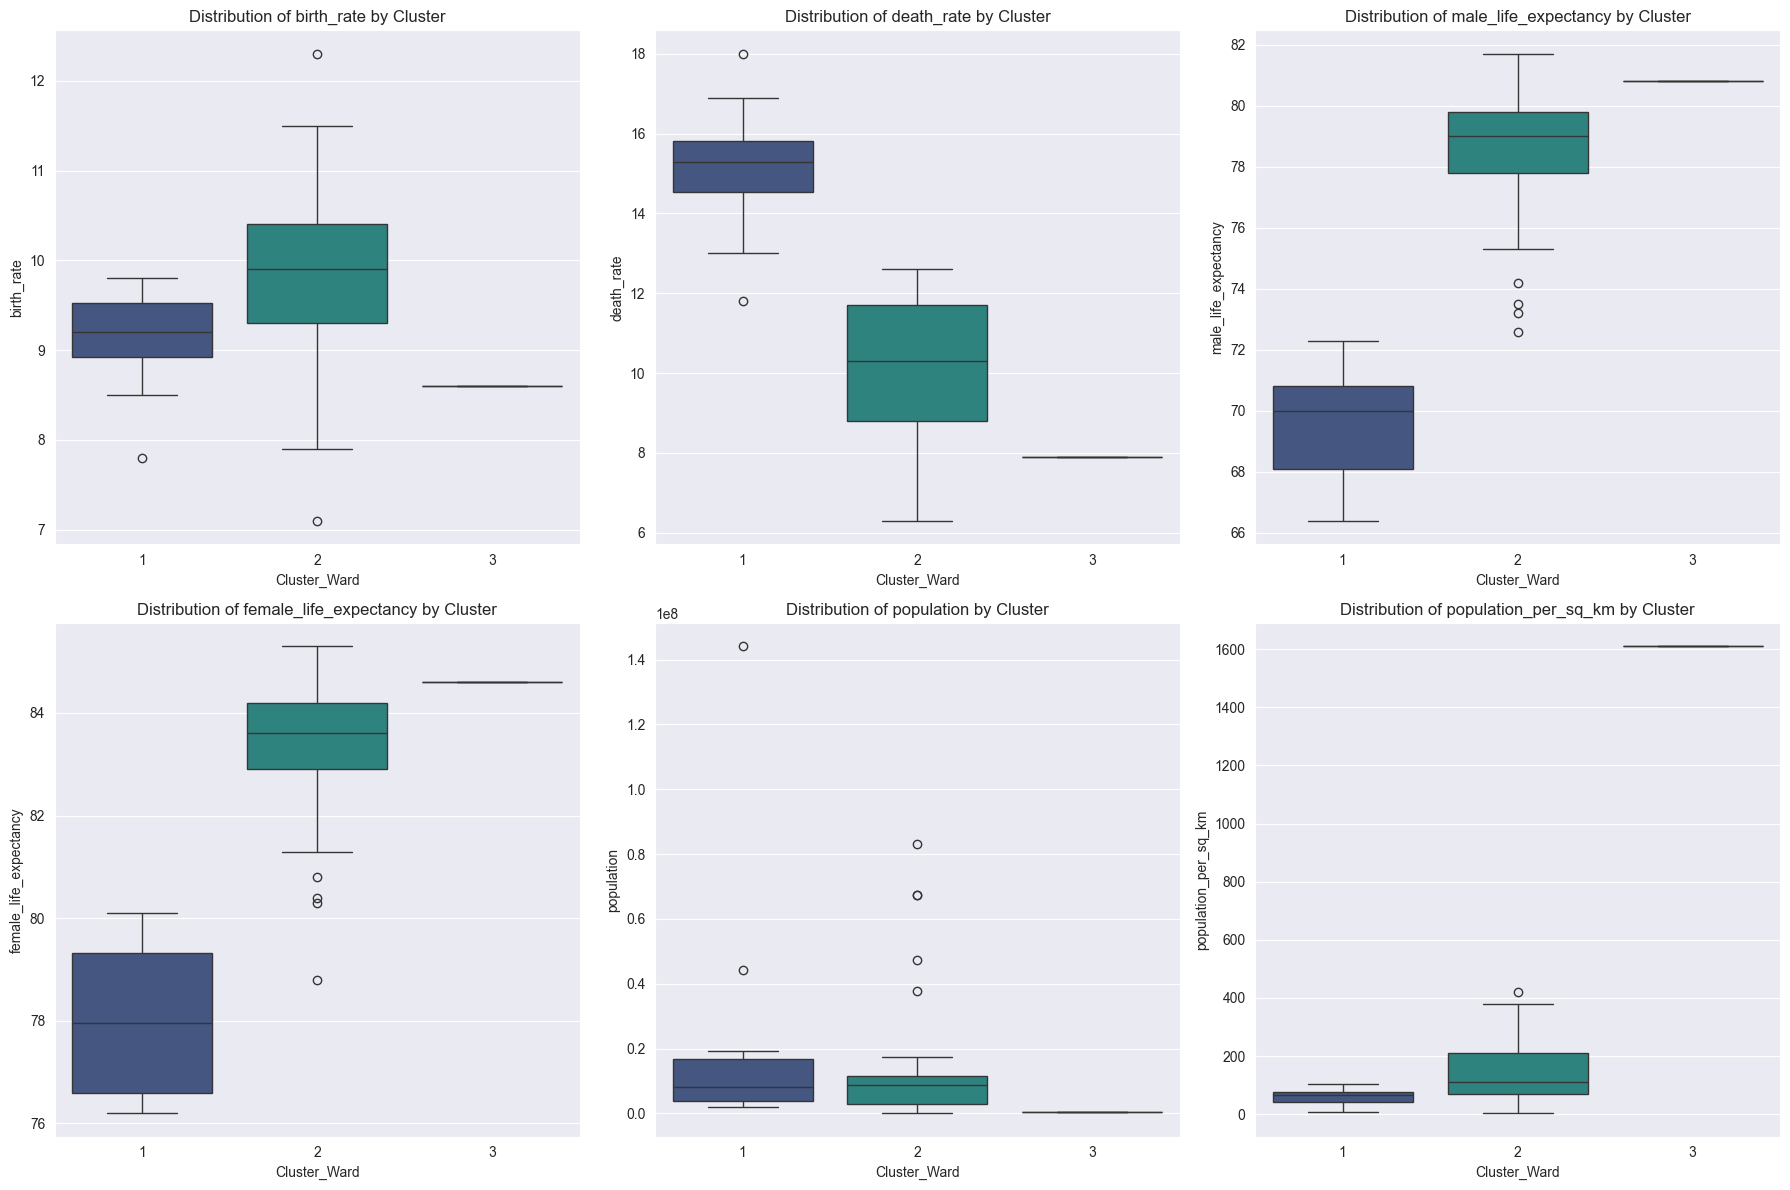

In [157]:
# v. Characterize each resulting cluster: What do the countries in each group have in common? How do they differ from others?

import pandas as pd

# Ensure all numerical columns are converted properly
numeric_cols = ["birth_rate", "death_rate", "male_life_expectancy", "female_life_expectancy",
                "population", "population_per_sq_km"]

# Convert to numeric (force conversion to avoid object dtype issues)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Compute cluster-wise summary statistics
cluster_summary = df.groupby("Cluster_Ward")[numeric_cols].mean()

# Display the result
print(cluster_summary)



# Plot distributions of key features for each cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

features = ["birth_rate", "death_rate", "male_life_expectancy", "female_life_expectancy", "population", "population_per_sq_km"]

for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(x=df["Cluster_Ward"], y=df[feature], ax=ax, palette="viridis")
    ax.set_title(f"Distribution of {feature} by Cluster")

plt.tight_layout()
plt.show()


### What do the countries in each group have in common? How do they differ from others?

### Cluster 1:

### Common Characteristics:
# i.  Countries in Cluster 1 have higher death rates (15.09), may be due to health challenges or lower quality healthcare systems in these countries.

# ii. Male and female both life expectancy is notably lower (69.5) and (78.06) compared to other clusters.

### Differences:
# i. Compared to other clusters, countries in Cluster 1 have the highest death rates and lowest life expectancies, especially for males.

# ii. These countries may face social and economic issues contributing to lower life expectancy and higher death rates (e.g., health care access, infrastructure challenges, or higher mortality from diseases).

### Cluster 2:

### Common Characteristics:
# i. Countries in Cluster 2 have moderate birth rates and moderate death rates.

# ii. Male life expectancy is significantly higher (78.33), and female life expectancy is also relatively high (83.25), suggesting better healthcare systems, higher standards of living, and economic stability.

# iii. Moderate population density (136.75 people per square km), which is higher than Cluster 1 but not as high as Cluster 3.

### Differences:
# i. Compared to Cluster 1, Cluster 2 countries have better health outcomes and higher life expectancy for both males and females.


### Cluster 3:

### Common Characteristics:
# i. Cluster 3 countries have the lowest birth rates (8.60) and death rates (7.90), suggesting these countries may be experiencing low fertility rates and higher overall life expectancy, which are typically seen in highly developed nations.

# ii. Life expectancy is highest for both males (80.8) and females (84.6), indicating very high healthcare standards.


### Differences:
 # i. Compared to Clusters 1 and 2, Cluster 3 countries have the lowest death rates and highest life expectancy, indicating excellent healthcare and overall quality of life.

## Lecture 8
# Exercise: Predicting Customer Churn with a Neural Network

You are provided with a real-world dataset from a telecom company that includes information about their customers, such as services signed up for, contract type, and payment behavior. Your task is to build a simple neural network to predict whether a customer will churn (i.e., leave the company) or not.

## Task
Build, train, and evaluate a neural network that predicts whether a customer has churned (`Churn` = Yes) or not (`Churn` = No), based on the other available features in the dataset.

1. **Drop irrelevant columns**, which have no numerical meaning.
2. **Convert columns** to numeric. There may be non-numeric entries; handle them appropriately (e.g. by coercing errors and dropping missing values).
3. **Convert the target column** from categorical ("Yes"/"No") to binary (1/0).
4. **Encode categorical features** using the `get_dummies`-function.
5. **Prepare your data** before you feed it into your model.
6. **Build a neural network** using Keras (e.g., with 1–3 layers) to predict churn.
7. **Compile your model** with an appropriate loss function and optimizer.
8. **Train your model** on the training data.
9. **Evaluate the performance** of your model on the test set and report the test accuracy.

In [1]:
import pandas as pd

df = pd.read_csv("Telco-Customer-Churn.csv")

In [2]:
# Show data types of all columns
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Drop irrelevant columns
df = df.drop(columns=['customerID'])

# Display the updated DataFrame
print("Columns after dropping irrelevant ones:", df.columns.tolist())

Columns after dropping irrelevant ones: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
#Step 2:
# Convert TotalCharges to numeric, coercing errors (e.g. blanks, spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values couldn't be converted
missing_total_charges = df['TotalCharges'].isna().sum()
print(f"Missing values in TotalCharges after conversion: {missing_total_charges}")

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Re-check data types
print(df.dtypes)


Missing values in TotalCharges after conversion: 11
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [6]:
# Convert target column to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Value counts for Churn:\n", df['Churn'].value_counts())


Value counts for Churn:
 Churn
0    5163
1    1869
Name: count, dtype: int64


In [7]:
# Get dummies for all categorical columns
df = pd.get_dummies(df)

print("Data shape after one-hot encoding:", df.shape)


Data shape after one-hot encoding: (7032, 46)


In [8]:
from sklearn.model_selection import train_test_split

# Split features and labels
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (5625, 45)
Test set size: (1407, 45)


In [9]:
#Build a neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/Users/emilymatos/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/emilymatos/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
#Train the model
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6858 - loss: 16.6688 - val_accuracy: 0.7787 - val_loss: 0.5632
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7367 - loss: 0.7207 - val_accuracy: 0.8089 - val_loss: 0.8163
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7519 - loss: 0.7323 - val_accuracy: 0.7840 - val_loss: 0.8693
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7618 - loss: 1.0111 - val_accuracy: 0.6907 - val_loss: 0.6744
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7532 - loss: 0.9147 - val_accuracy: 0.7822 - val_loss: 0.4383
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7627 - loss: 0.7485 - val_accuracy: 0.7884 - val_loss: 0.7482
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7704 - loss: 0.8688 - val_accuracy: 0.7662 - val_loss: 0.4864
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7782 - loss: 0.6307 - val_accuracy: 0

In [12]:
#Evaluate the model
#Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy:.2f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7893 - loss: 1.2259 
Test Accuracy: 0.79
